# import

In [ ]:
import pandas as pd
import numpy as np
import random
import collections
import graphviz
import sklearn.metrics as mt
import matplotlib.font_manager as fm
import plotly.express as px

# 시각화 라이브러리
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
from sklearn.cluster import AffinityPropagation
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

random.seed(2023)

import warnings
warnings.filterwarnings('ignore')

# Data Load

In [ ]:
# CustomerID : 고유 ID
# City : 도시
# Zip Code : 우편번호
# Latitude : 고객의 주 거주지 위도.
# Longitude : 고객의 기본 거주지의 경도입니다.
# Gender : 성별
# Senior Citizen : 고객이 65세 이상인지 표시: 예, 아니오
# Partner : 고객에게 파트너가 있는지 표시: 예, 아니오
# Dependents : 고객이 부양 가족과 함께 살고 있는지 여부를 나타냅니다: 예, 아니요.
# Tenure Months : 위에서 지정한 분기 말까지 고객이 회사에 근무한 총 개월 수를 나타냅니다.
# Phone Service : 집 전화 서비스 가입여부 : 예, 아니오
# Multiple Lines : 고객이 회사와 여러 전화 회선에 가입했는지 여부를 나타냅니다. 예, 아니오
# Internet Service : No, DSL, Fiber Optic, Cable 회사에서 인터넷 서비스에 가입했는지 여부를 나타냅니다.
# Online Security : 추가 온라인 보안 서비스에 가입했는지 표시: 예, 아니오
# Online Backup : 추가 온라인 백업 서비스에 가입되어 있는지 표시: 예, 아니오
# Device Protection : 인터넷 장비에 대한 추가 기기 보호 요금제 가입 여부 표시: 예, 아니요
# Tech Support : 대기 시간이 단축된 회사의 추가 기술 지원 계획에 고객이 가입했는지 표시: 예, 아니요
# Streaming TV : 고객이 인터넷 서비스를 사용하여 타사 공급자의 TV 프로그램을 스트리밍하는지 여부를 나타냅니다. 예, 아니요. 회사는 이 서비스에 대해 추가 요금을 부과하지 않습니다.
# Streaming Movies : 고객이 타사 공급자의 영화를 스트리밍하기 위해 인터넷 서비스를 사용하는지 여부를 나타냅니다. 예, 아니요. 회사는 이 서비스에 대해 추가 요금을 부과하지 않습니다.
# Contract : 고객의 현재 계약 유형을 나타냅니다: 월 단위, 1년, 2년.
# Paperless Billing : 인터넷 영수증. Yes, No
# Payment Method : 고객이 결제하는 방법을 나타냅니다: 은행인출, 신용카드, 우편수표
# Monthly Charge : 회사에서 제공하는 모든 서비스에 대한 고객의 현재 월 총 요금을 나타냅니다.
# Total Charges : 위에서 지정한 분기 말까지 계산된 고객의 총 요금을 나타냅니다.
# Churn Label : 예 = 고객이 이번 분기에 회사를 떠났습니다. 아니요 = 고객이 회사에 남아 있습니다. 이탈 가치와 직접적인 관련이 있습니다.
# Churn Value : 1 = 고객이 이번 분기에 회사를 떠났습니다. 0 = 고객이 회사에 남아 있습니다. Churn Label과 직접 관련이 있습니다.
# Churn Score : 예측 도구 IBM SPSS Modeler를 사용하여 계산되는 0-100 사이의 값입니다. 이 모델은 이탈을 유발하는 것으로 알려진 여러 요인을 통합합니다. 점수가 높을수록 고객이 이탈할 가능성이 높아집니다.
# CLTV : 고객평생가치. 예상 CLTV는 회사 공식과 기존 데이터를 사용하여 계산됩니다. 가치가 높을수록 고객의 가치가 높아집니다. 가치가 높은 고객은 이탈 여부를 모니터링해야 합니다.
# Churn Reason : 회사를 떠나는 고객의 구체적인 이유입니다. 이탈 카테고리와 직접 관련이 있습니다.

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/ML/Telco_customer_churn.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 30 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         7032 non-null   object 
 1   City               7032 non-null   object 
 2   Zip Code           7032 non-null   int64  
 3   Latitude           7032 non-null   float64
 4   Longitude          7032 non-null   float64
 5   Gender             7032 non-null   object 
 6   Senior Citizen     7032 non-null   object 
 7   Partner            7032 non-null   object 
 8   Dependents         7032 non-null   object 
 9   Tenure Months      7032 non-null   int64  
 10  Phone Service      7032 non-null   object 
 11  Multiple Lines     7032 non-null   object 
 12  Internet Service   7032 non-null   object 
 13  Online Security    7032 non-null   object 
 14  Online Backup      7032 non-null   object 
 15  Device Protection  7032 non-null   object 
 16  Tech Support       7032 

In [ ]:
##
def report(df):
    col = []
    d_type = []
    uniques = []
    n_uniques = []

    for i in df.columns:
        col.append(i)
        d_type.append(df[i].dtypes)
        uniques.append(df[i].unique()[:5])
        n_uniques.append(df[i].nunique())

    return pd.DataFrame({'Column': col, 'd_type': d_type, 'unique_sample': uniques, 'n_uniques': n_uniques})

report(df)

Column   d_type  \
0          CustomerID   object   
1               Count    int64   
2             Country   object   
3               State   object   
4                City   object   
5            Zip Code    int64   
6            Lat Long   object   
7            Latitude  float64   
8           Longitude  float64   
9              Gender   object   
10     Senior Citizen   object   
11            Partner   object   
12         Dependents   object   
13      Tenure Months    int64   
14      Phone Service   object   
15     Multiple Lines   object   
16   Internet Service   object   
17    Online Security   object   
18      Online Backup   object   
19  Device Protection   object   
20       Tech Support   object   
21       Streaming TV   object   
22   Streaming Movies   object   
23           Contract   object   
24  Paperless Billing   object   
25     Payment Method   object   
26    Monthly Charges  float64   
27      Total Charges   object   
28        Churn Label   object   
29        Churn Value    int64   
30        Churn Score    int64   
31               CLTV    int64   
32       Churn Reason   object   

                                        unique_sample  n_uniques  
0   [3668-QPYBK, 9237-HQITU, 9305-CDSKC, 7892-POOK...       7043  
1                                                 [1]          1  
2                                     [United States]          1  
3                                        [California]          1  
4   [Los Angeles, Beverly Hills, Huntington Park, ...       1129  
5                 [90003, 90005, 90006, 90010, 90015]       1652  
6   [33.964131, -118.272783, 34.059281, -118.30742...       1652  
7   [33.964131, 34.059281, 34.048013, 34.062125, 3...       1652  
8   [-118.272783, -118.30742, -118.293953, -118.31...       1651  
9                                      [Male, Female]          2  
10                                          [No, Yes]          2  
11                                          [No, Yes]          2  
12                                          [No, Yes]          2  
13                                 [2, 8, 28, 49, 10]         73  
14                                          [Yes, No]          2  
15                        [No, Yes, No phone service]          3  
16                             [DSL, Fiber optic, No]          3  
17                     [Yes, No, No internet service]          3  
18                     [Yes, No, No internet service]          3  
19                     [No, Yes, No internet service]          3  
20                     [No, Yes, No internet service]          3  
21                     [No, Yes, No internet service]          3  
22                     [No, Yes, No internet service]          3  
23               [Month-to-month, Two year, One year]          3  
24                                          [Yes, No]          2  
25  [Mailed check, Electronic check, Bank transfer...          4  
26                 [53.85, 70.7, 99.65, 104.8, 103.7]       1585  
27           [108.15, 151.65, 820.5, 3046.05, 5036.3]       6531  
28                                          [Yes, No]          2  
29                                             [1, 0]          2  
30                               [86, 67, 84, 89, 78]         85  
31                     [3239, 2701, 5372, 5003, 5340]       3438  
32  [Competitor made better offer, Moved, Competit...         20

In [ ]:
# 데이터 중복
dup_data = df[df.duplicated()]
print(dup_data.shape)

(0, 33)


In [ ]:
# Numerical data
# Count 변수는 1만 존재
df.describe()

Count      Zip Code     Latitude    Longitude  Tenure Months  \
count  7043.0   7043.000000  7043.000000  7043.000000    7043.000000   
mean      1.0  93521.964646    36.282441  -119.798880      32.371149   
std       0.0   1865.794555     2.455723     2.157889      24.559481   
min       1.0  90001.000000    32.555828  -124.301372       0.000000   
25%       1.0  92102.000000    34.030915  -121.815412       9.000000   
50%       1.0  93552.000000    36.391777  -119.730885      29.000000   
75%       1.0  95351.000000    38.224869  -118.043237      55.000000   
max       1.0  96161.000000    41.962127  -114.192901      72.000000   

       Monthly Charges  Churn Value  Churn Score         CLTV  
count      7043.000000  7043.000000  7043.000000  7043.000000  
mean         64.761692     0.265370    58.699418  4400.295755  
std          30.090047     0.441561    21.525131  1183.057152  
min          18.250000     0.000000     5.000000  2003.000000  
25%          35.500000     0.000000    40.000000  3469.000000  
50%          70.350000     0.000000    61.000000  4527.000000  
75%          89.850000     1.000000    75.000000  5380.500000  
max         118.750000     1.000000   100.000000  6500.000000

In [ ]:
# Categorical data
# Country, state는 unique 1개 -> drop
# Churn Reason -> drop (실제 이유 예측), 실제 평가 지표로 이용
# 인터넷 서비스를 이용하는 사람 중에 다른 서비스 안쓰는 사람 비율 판단 -> Y/N로 판단 가능
df.describe(include='object')

CustomerID         City                Lat Long Gender Senior Citizen  \
count         7043         7043                    7043   7043           7043   
unique        7043         1129                    1652      2              2   
top     3668-QPYBK  Los Angeles  33.964131, -118.272783   Male             No   
freq             1          305                       5   3555           5901   

       Partner Dependents Phone Service Multiple Lines Internet Service  ...  \
count     7043       7043          7043           7043             7043  ...   
unique       2          2             2              3                3  ...   
top         No         No           Yes             No      Fiber optic  ...   
freq      3641       5416          6361           3390             3096  ...   

       Device Protection Tech Support Streaming TV Streaming Movies  \
count               7043         7043         7043             7043   
unique                 3            3            3                3   
top                   No           No           No               No   
freq                3095         3473         2810             2785   

              Contract Paperless Billing    Payment Method Total Charges  \
count             7043              7043              7043          7043   
unique               3                 2                 4          6531   
top     Month-to-month               Yes  Electronic check          20.2   
freq              3875              4171              2365            11   

       Churn Label                Churn Reason  
count         7043                        1869  
unique           2                          20  
top             No  Attitude of support person  
freq          5174                         192  

[4 rows x 22 columns]

In [ ]:
# unique 컬럼 제거
df = df.drop(['Count','Country', 'State', 'Lat Long'], axis=1)

In [ ]:
# 결측지 확인
df.isnull().sum()

CustomerID              0
Count                   0
Country                 0
State                   0
City                    0
Zip Code                0
Lat Long                0
Latitude                0
Longitude               0
Gender                  0
Senior Citizen          0
Partner                 0
Dependents              0
Tenure Months           0
Phone Service           0
Multiple Lines          0
Internet Service        0
Online Security         0
Online Backup           0
Device Protection       0
Tech Support            0
Streaming TV            0
Streaming Movies        0
Contract                0
Paperless Billing       0
Payment Method          0
Monthly Charges         0
Total Charges           0
Churn Label             0
Churn Value             0
Churn Score             0
CLTV                    0
Churn Reason         5174
dtype: int64

# 결측치 처리

In [ ]:
# 결측치 확인
# 총 요금이 (이용 기간 * 달 요금) 값과 편차를 계산. -> 차이를 고려하여 채우기
df[['Monthly Charges', 'Tenure Months', 'Total Charges']]

Monthly Charges  Tenure Months Total Charges
0               53.85              2        108.15
1               70.70              2        151.65
2               99.65              8         820.5
3              104.80             28       3046.05
4              103.70             49        5036.3
...               ...            ...           ...
7038            21.15             72        1419.4
7039            84.80             24        1990.5
7040           103.20             72        7362.9
7041            29.60             11        346.45
7042           105.65             66        6844.5

[7043 rows x 3 columns]

In [ ]:
df['Total Charges']

0        108.15
1        151.65
2         820.5
3       3046.05
4        5036.3
         ...   
7038     1419.4
7039     1990.5
7040     7362.9
7041     346.45
7042     6844.5
Name: Total Charges, Length: 7043, dtype: object

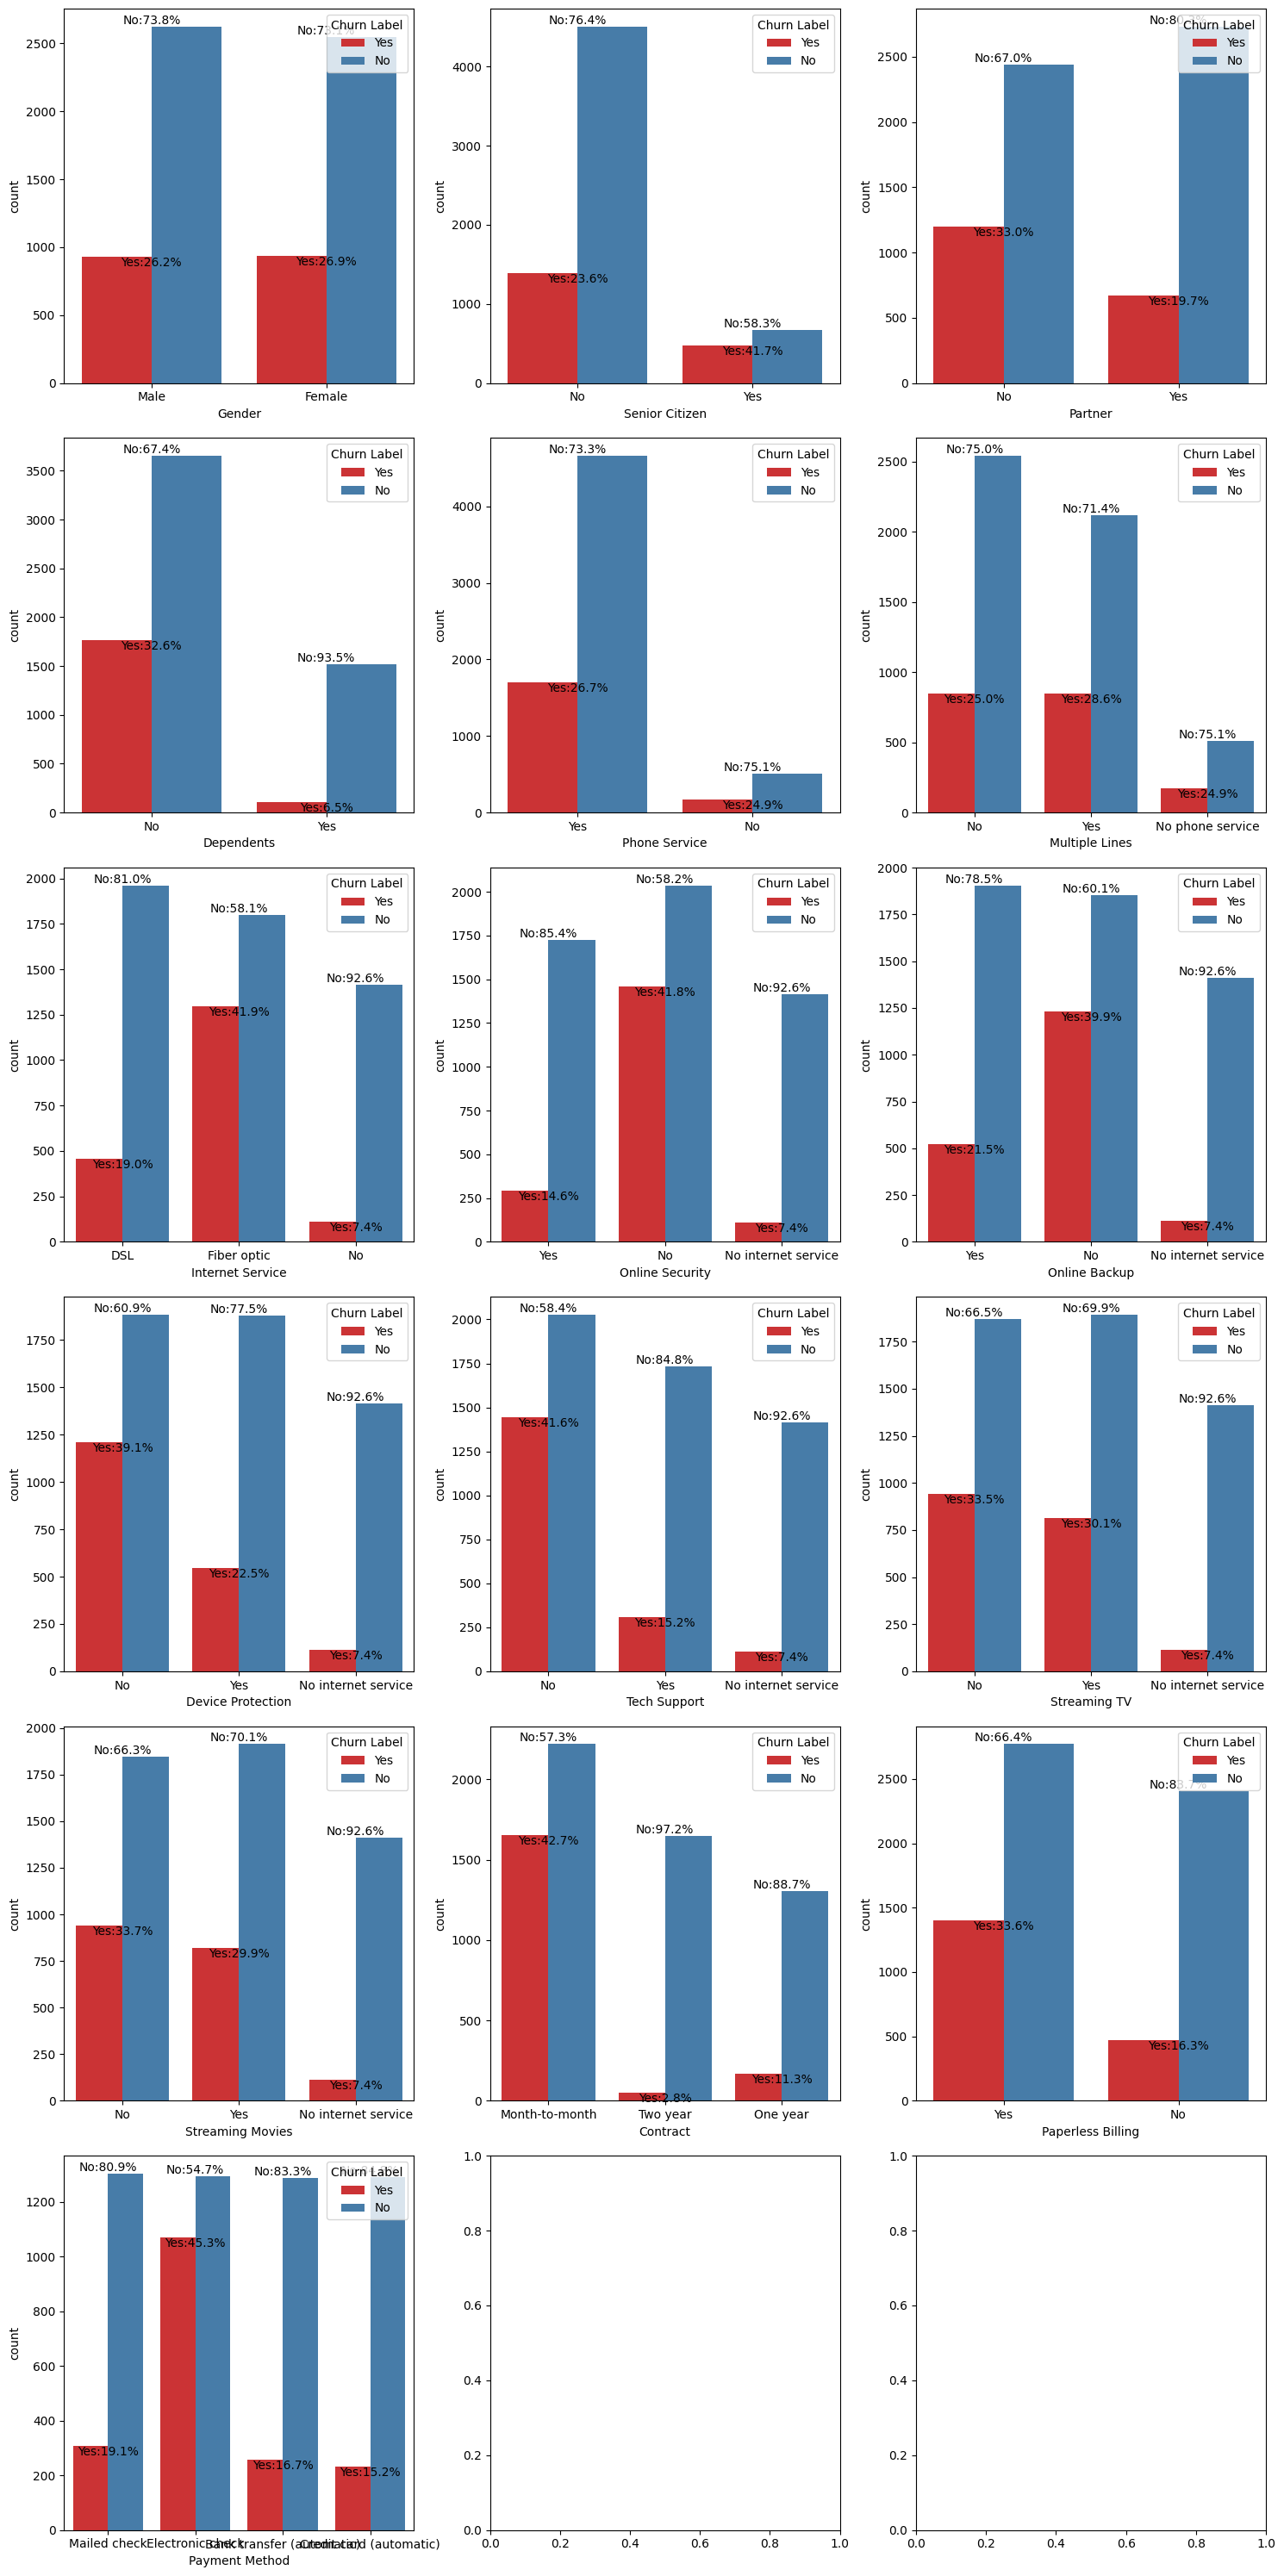

In [ ]:
fig, axes = plt.subplots(6, 3, figsize=(15, 30))
axes = axes.flatten()

categories = ['Gender', 'Senior Citizen', 'Partner', 'Dependents', 'Phone Service', 'Multiple Lines',
              'Internet Service', 'Online Security', 'Online Backup', 'Device Protection', 'Tech Support',
              'Streaming TV', 'Streaming Movies', 'Contract', 'Paperless Billing', 'Payment Method']

for i in range(len(categories)):
    ax = sns.countplot(x=categories[i], data=df, palette='Set1', ax=axes[i], hue='Churn Label')

    # Calculate churn label ratios
    labels = [label.get_text() for label in ax.get_xticklabels()]

    for label in labels:
        churn_yes_count = len(df[(df[categories[i]] == label) & (df['Churn Label'] == 'Yes')])
        churn_no_count = len(df[(df[categories[i]] == label) & (df['Churn Label'] == 'No')])
        churn_total_count = churn_yes_count + churn_no_count

        churn_yes_ratio = (churn_yes_count / churn_total_count) * 100
        churn_no_ratio = (churn_no_count / churn_total_count) * 100

        # Display the ratios above each bar
        ax.text(labels.index(label), churn_yes_count, f'Yes:{churn_yes_ratio:.1f}%',ha = 'right', va='bottom')
        ax.text(labels.index(label), churn_no_count, f'No:{churn_no_ratio:.1f}%', ha='left', va='bottom')

plt.tight_layout()
plt.show()

In [ ]:
df['Total Charges'] = df['Total Charges'].replace(' ', 0)
df['Total Charges'] = df['Total Charges'].astype(float)

df_zero_total_charges = df[df['Total Charges'] == 0]
df_zero_total_charges['Total Charges']
df['Total Charges']

0        108.15
1        151.65
2        820.50
3       3046.05
4       5036.30
         ...   
7038    1419.40
7039    1990.50
7040    7362.90
7041     346.45
7042    6844.50
Name: Total Charges, Length: 7043, dtype: float64

In [ ]:
# 요금 분포 확인
df['calc_charges'] = df['Monthly Charges'] * df['Tenure Months']
df['diff_in_charges'] = df['Total Charges'] - df['calc_charges']
fig = px.histogram(df, x="diff_in_charges",color = 'Contract',marginal="box")
fig.show()

In [ ]:
# 요금의 편차가 계약별로 10% 구간을 제외하고 100$ 이내의 편차를 가짐
# 결측 요금을 calc_charges로 대체
df.groupby('Contract')[['Total Charges','diff_in_charges']].quantile([.50,.80,.90,.95])

Total Charges  diff_in_charges
Contract                                           
Month-to-month 0.50        679.550            0.000
               0.80       2485.730           24.810
               0.90       3844.060           54.020
               0.95       4966.920           85.330
One year       0.50       2656.700            0.600
               0.80       5283.870           55.000
               0.90       6341.050           92.150
               0.95       7072.120          133.300
Two year       0.50       3593.800            0.000
               0.80       6394.440           61.180
               0.90       7452.350           97.210
               0.95       7921.315          139.005

In [ ]:
df['Total Charges'] = np.where(df['Total Charges'].isna() == True,df['calc_charges'], df['Total Charges'])

In [ ]:
df = df.drop(['calc_charges','diff_in_charges'], axis=1)

# Data Processing

## EDA

In [ ]:
# 도시별 거주 인구
fig = px.bar(df.groupby(['City'])['CustomerID'].count().reset_index().sort_values('CustomerID',
                                                                                    ascending=False).head(50),
             x='City',
             y='CustomerID',
             color = 'CustomerID',
             text = 'CustomerID')
fig.show()

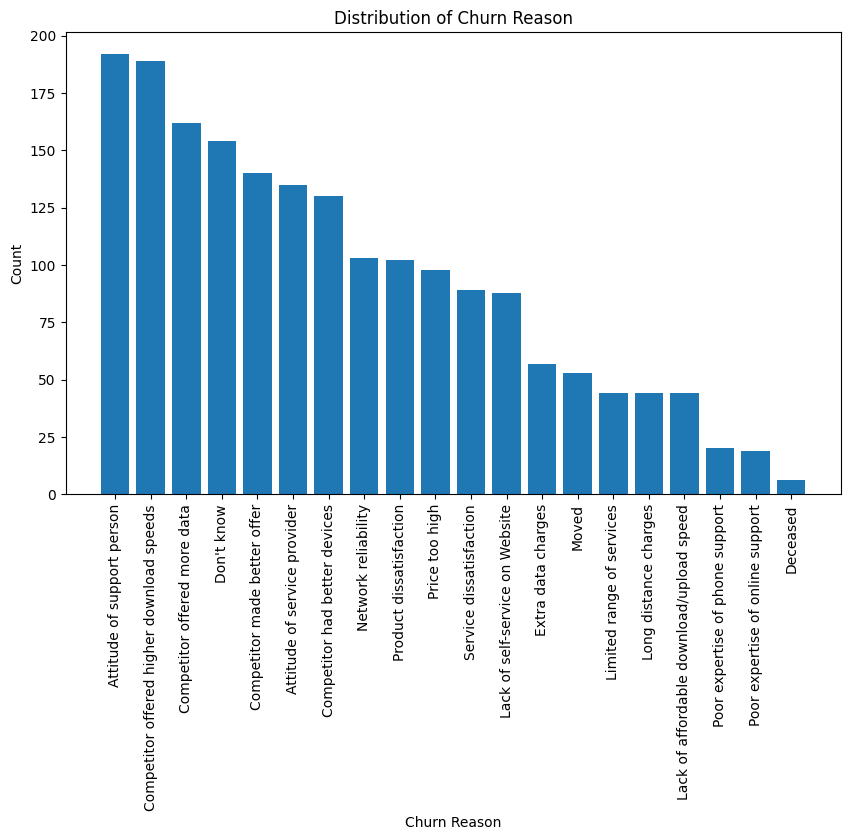

In [ ]:
# 이탈 사유
reason_counts = df['Churn Reason'].value_counts()

# Create a bar plot of the Churn Reason counts
plt.figure(figsize=(10,6))
plt.bar(reason_counts.index, reason_counts.values)
plt.xticks(rotation=90)
plt.xlabel('Churn Reason')
plt.ylabel('Count')
plt.title('Distribution of Churn Reason')
plt.show()

# 지원사의 태도, 경쟁사의 높은 속도 및 데이터로 이탈이 상위 랭크
# 알지못하는 경우도 상당수
# 속도 및 데이터 처리와 관련된 Internet Service, 계약 위주로 체크

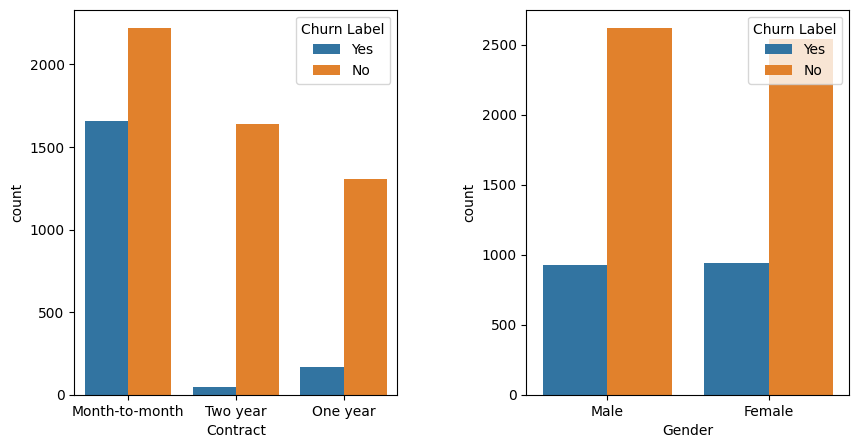

In [ ]:
# 계약관련 분포
fig, axs = plt.subplots(ncols=2, figsize=(10,5))
sns.countplot(x='Contract', hue='Churn Label', data=df, ax=axs[0])
sns.countplot(x='Gender', hue='Churn Label', data=df, ax=axs[1])

# Adjust spacing between subplots
fig.subplots_adjust(wspace=0.4)

# Show the plots
plt.show()

# 대부분의 이탈 고객의 계약은 Month-to-month
# 남성, 여성 이탈인원은 비슷함

In [ ]:
# Create pie chart
fig = px.pie(df.groupby(['Contract','Churn Label'])['CustomerID'].count().reset_index(),
             values='CustomerID',
             names='Contract',
             facet_col='Churn Label',
             title='Churn rate by Contract')

# Adjust spacing and font size
fig.update_layout(
    font=dict(
        size=18
    ),
    margin=dict(
        t=150,  # adjust top margin
        b=0,  # remove bottom margin
        l=0,  # remove left margin
        r=0,  # remove right margin
    )
)

# Show the plot
fig.show()

# 대부분의 이탈 고객의 계약은 Month-to-month

In [ ]:
# Internet Service 상관관계 분석을 위한
corr_df = df.copy()

corr_df['Churn Label'].replace(to_replace='Yes', value=1, inplace=True)
corr_df['Churn Label'].replace(to_replace='No',  value=0, inplace=True)

df_dummies = pd.get_dummies(corr_df[['Churn Label','Phone Service','Multiple Lines','Internet Service','Online Security',
                                 'Online Backup','Device Protection','Tech Support','Streaming TV',
                                 'Streaming Movies']])

<Axes: title={'center': 'Correlation of Features'}>

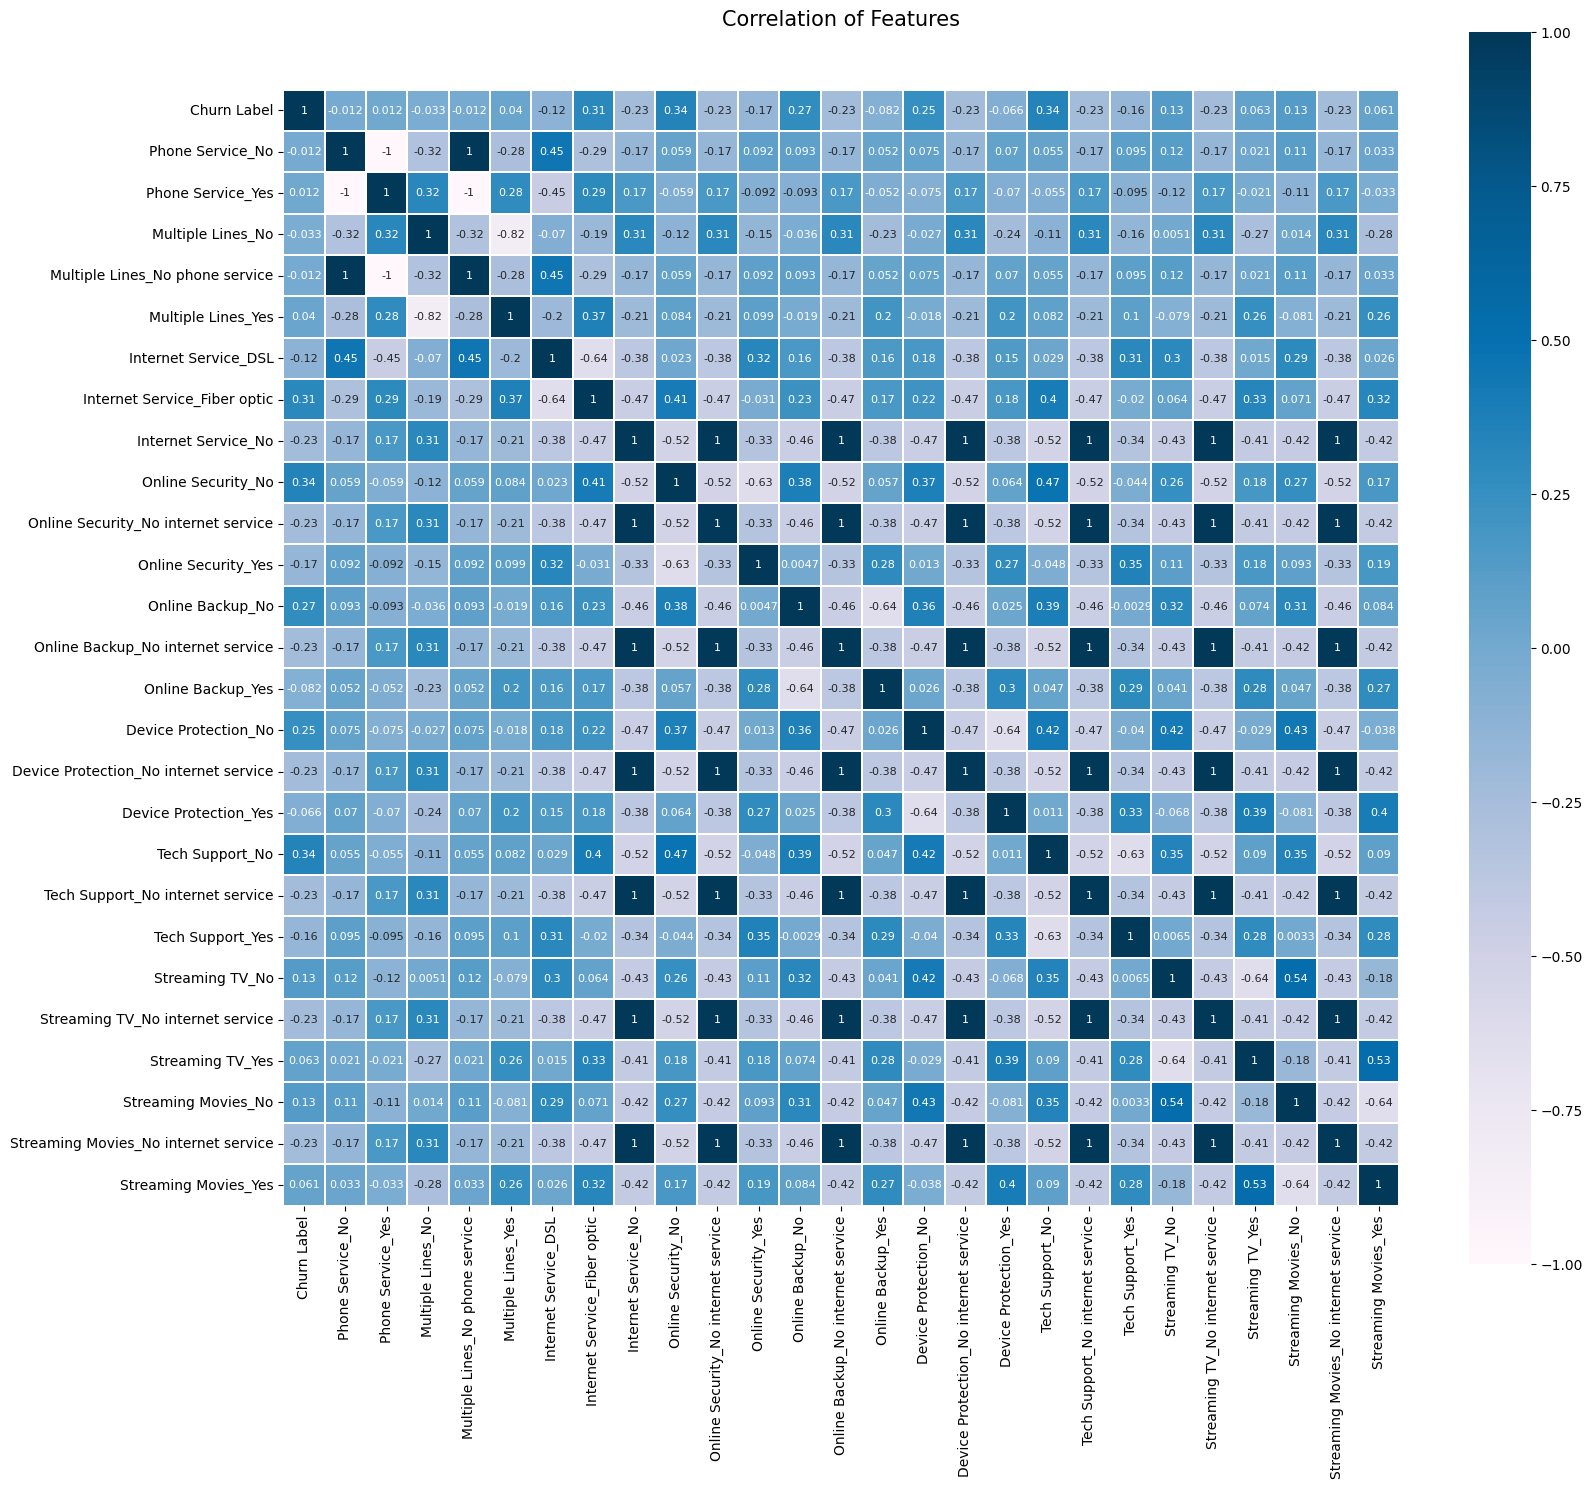

In [ ]:
# 상관관계 분석
colormap = plt.cm.PuBu
plt.figure(figsize=(18, 16))
plt.title("Correlation of Features", y=1.05, size=15)
sns.heatmap(df_dummies.corr(), linewidths=0.1, vmax=1.0,
           square=True, cmap=colormap, linecolor="white", annot=True, annot_kws={"size": 8})

# fiber optic, Onlinde 보안, 백업, 기술 지원과 양의 상관관계
# 온라인 보안, 기술 지원, 인터넷 서비스 종류와 양의 상관관계
# 백업, 인터넷 서비스와 음의 상관관계
# 인터넷 서비스, 기술과의 관계 확인 필요!

In [ ]:
# bar 형태의 corration matrix
fig = px.bar(df_dummies.corr()['Churn Label'].sort_values(ascending = False),
             color = 'value')
fig.show()

In [ ]:
# Internet Service 분석
fig = px.pie(df.groupby(['Internet Service','Churn Label'])['CustomerID'].count().reset_index(),
             values='CustomerID',
             names='Internet Service',
             facet_col='Churn Label',
             title='Churn rate by Internet Service')

# Adjust spacing and font size
fig.update_layout(
    font=dict(
        size=18
    ),
    margin=dict(
        t=150,  # adjust top margin
        b=0,  # remove bottom margin
        l=0,  # remove left margin
        r=0,  # remove right margin
    )
)

# Show the plot
fig.show()

# Fiber optic 사용자의 이탈률이 상당히 높음 (약 70%)
# 인터넷 서비스를 이용했으나, 타사의 서비스, 태도가 더 좋음 -> 이탈 사유

In [ ]:
# fiber 이용자의 계약 파악
df_fiber = df[(df['Internet Service'] == 'Fiber optic') & (df['Churn Label'] == 'Yes')]

# Create pie chart
fig = px.pie(df_fiber.groupby(['Contract','Churn Label'])['CustomerID'].count().reset_index(),
             values='CustomerID',
             names='Contract',
             facet_col='Churn Label',
             title='fiber user by Contract')

# Adjust spacing and font size
fig.update_layout(
    font=dict(
        size=18
    ),
    margin=dict(
        t=150,  # adjust top margin
        b=0,  # remove bottom margin
        l=0,  # remove left margin
        r=0,  # remove right margin
    )
)

# Show the plot
fig.show()

# 역시 Month to month 계약 형태가 가장 많음
# 장기계약의 비중이 적음

In [ ]:
# 사용자의 거래방식
fig = px.pie(df.groupby(['Payment Method','Churn Label'])['CustomerID'].count().reset_index(),
             values='CustomerID',
             names='Payment Method',
             facet_col='Churn Label',
             title='fiber user by Payment Method')

# Adjust spacing and font size
fig.update_layout(
    font=dict(
        size=18
    ),
    margin=dict(
        t=150,  # adjust top margin
        b=0,  # remove bottom margin
        l=0,  # remove left margin
        r=0,  # remove right margin
    )
)

# Show the plot
fig.show()

# 이탈 고객의 절반 이상이 전자거래 사용
# Internet Service와 연관지어 확인 피리요

In [ ]:
# fiber 사용자의 거래방식
fig = px.pie(df.groupby(['Payment Method','Churn Label'])['CustomerID'].count().reset_index(),
             values='CustomerID',
             names='Payment Method',
             facet_col='Churn Label',
             title='Churn rate by Payment Method')

# Adjust spacing and font size
fig.update_layout(
    font=dict(
        size=18
    ),
    margin=dict(
        t=150,  # adjust top margin
        b=0,  # remove bottom margin
        l=0,  # remove left margin
        r=0,  # remove right margin
    )
)

# Show the plot
fig.show()

# 65%가 전자거래 이용

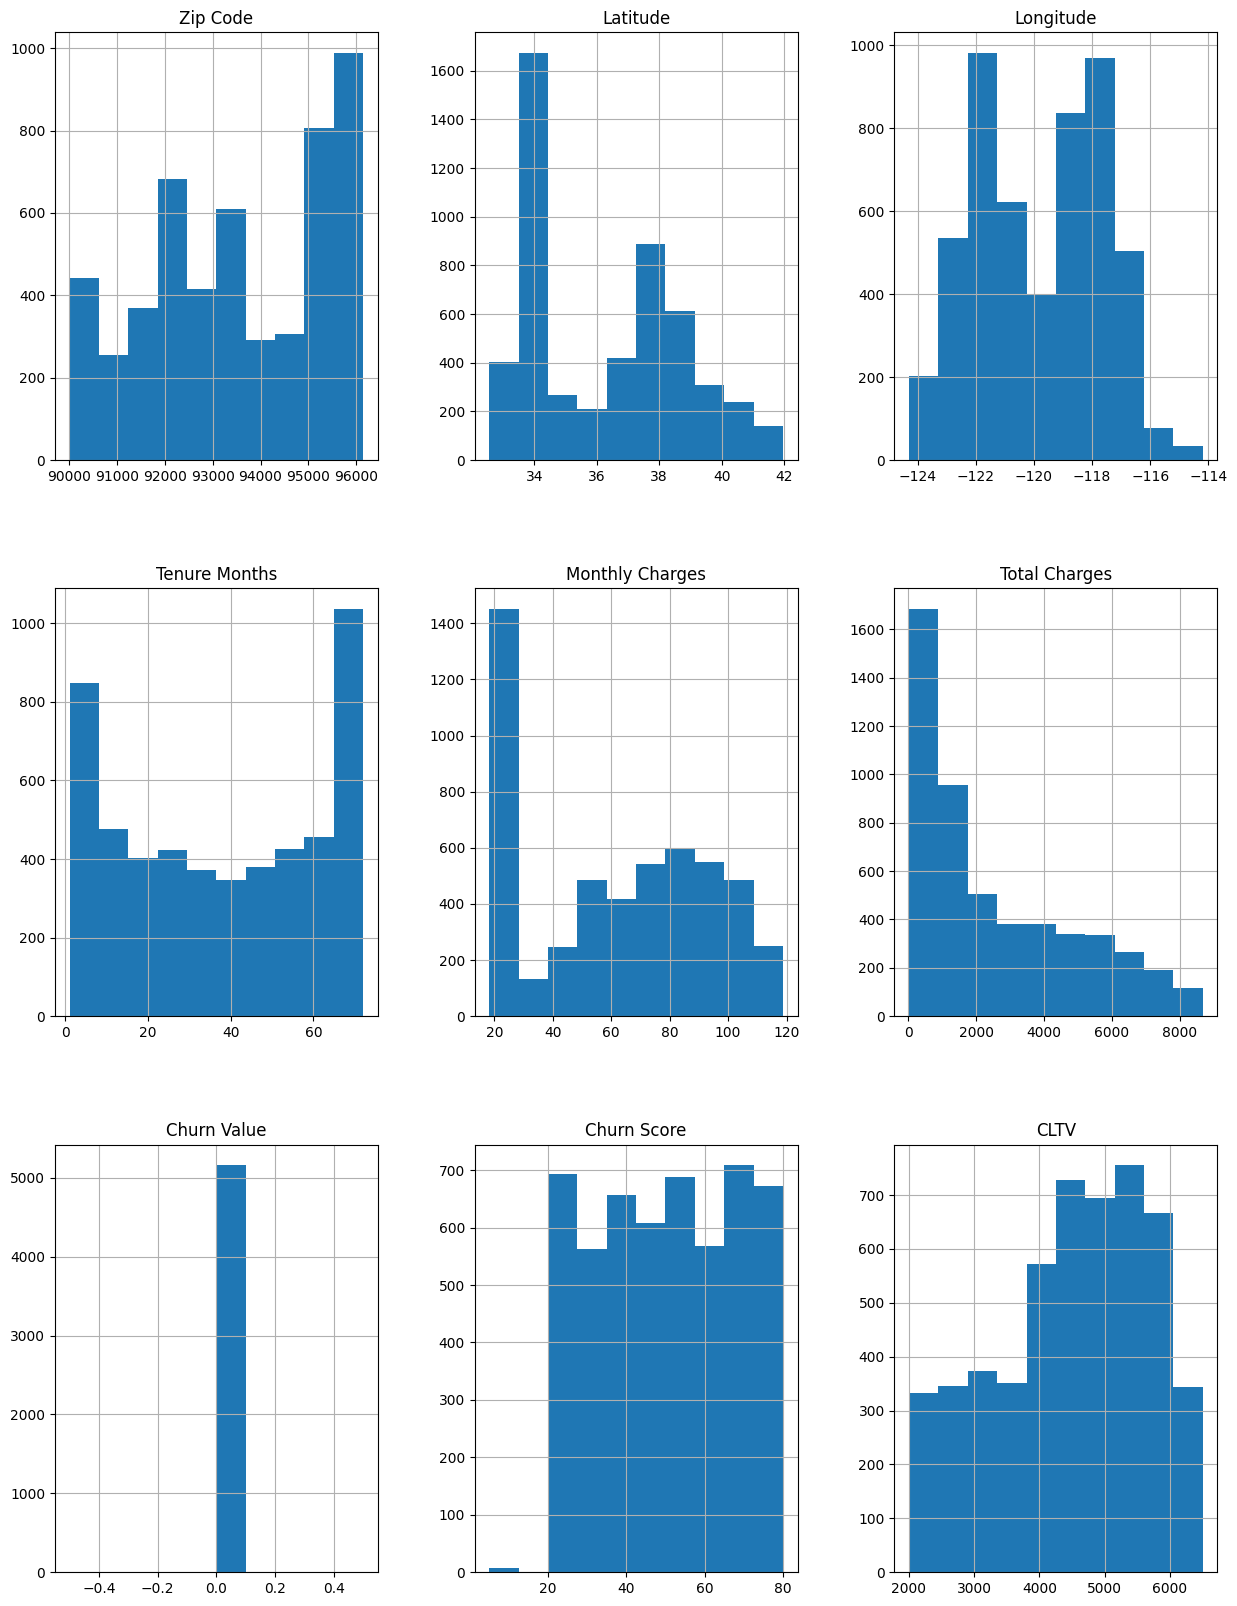

In [ ]:
# 비이탈자 Hist 시각화
df_Nchurn = df[df['Churn Label'] == 'No']
df_Nchurn.hist(figsize=(15, 20))
plt.show()

In [ ]:
df

CustomerID          City  Zip Code   Latitude   Longitude  Gender  \
0     3668-QPYBK   Los Angeles     90003  33.964131 -118.272783    Male   
1     9237-HQITU   Los Angeles     90005  34.059281 -118.307420  Female   
2     9305-CDSKC   Los Angeles     90006  34.048013 -118.293953  Female   
3     7892-POOKP   Los Angeles     90010  34.062125 -118.315709  Female   
4     0280-XJGEX   Los Angeles     90015  34.039224 -118.266293    Male   
...          ...           ...       ...        ...         ...     ...   
7038  2569-WGERO       Landers     92285  34.341737 -116.539416  Female   
7039  6840-RESVB      Adelanto     92301  34.667815 -117.536183    Male   
7040  2234-XADUH         Amboy     92304  34.559882 -115.637164  Female   
7041  4801-JZAZL  Angelus Oaks     92305  34.167800 -116.864330  Female   
7042  3186-AJIEK  Apple Valley     92308  34.424926 -117.184503    Male   

     Senior Citizen Partner Dependents  Tenure Months  ...        Contract  \
0                No      No         No              2  ...  Month-to-month   
1                No      No        Yes              2  ...  Month-to-month   
2                No      No        Yes              8  ...  Month-to-month   
3                No     Yes        Yes             28  ...  Month-to-month   
4                No      No        Yes             49  ...  Month-to-month   
...             ...     ...        ...            ...  ...             ...   
7038             No      No         No             72  ...        Two year   
7039             No     Yes        Yes             24  ...        One year   
7040             No     Yes        Yes             72  ...        One year   
7041             No     Yes        Yes             11  ...  Month-to-month   
7042             No      No         No             66  ...        Two year   

     Paperless Billing             Payment Method Monthly Charges  \
0                  Yes               Mailed check           53.85   
1                  Yes           Electronic check           70.70   
2                  Yes           Electronic check           99.65   
3                  Yes           Electronic check          104.80   
4                  Yes  Bank transfer (automatic)          103.70   
...                ...                        ...             ...   
7038               Yes  Bank transfer (automatic)           21.15   
7039               Yes               Mailed check           84.80   
7040               Yes    Credit card (automatic)          103.20   
7041               Yes           Electronic check           29.60   
7042               Yes  Bank transfer (automatic)          105.65   

     Total Charges Churn Label Churn Value Churn Score  CLTV  \
0           108.15         Yes           1          86  3239   
1           151.65         Yes           1          67  2701   
2           820.50         Yes           1          86  5372   
3          3046.05         Yes           1          84  5003   
4          5036.30         Yes           1          89  5340   
...            ...         ...         ...         ...   ...   
7038       1419.40          No           0          45  5306   
7039       1990.50          No           0          59  2140   
7040       7362.90          No           0          71  5560   
7041        346.45          No           0          59  2793   
7042       6844.50          No           0          38  5097   

                       Churn Reason  
0      Competitor made better offer  
1                             Moved  
2                             Moved  
3                             Moved  
4     Competitor had better devices  
...                             ...  
7038                            NaN  
7039                            NaN  
7040                            NaN  
7041                            NaN  
7042                            NaN  

[7032 rows x 29 columns]

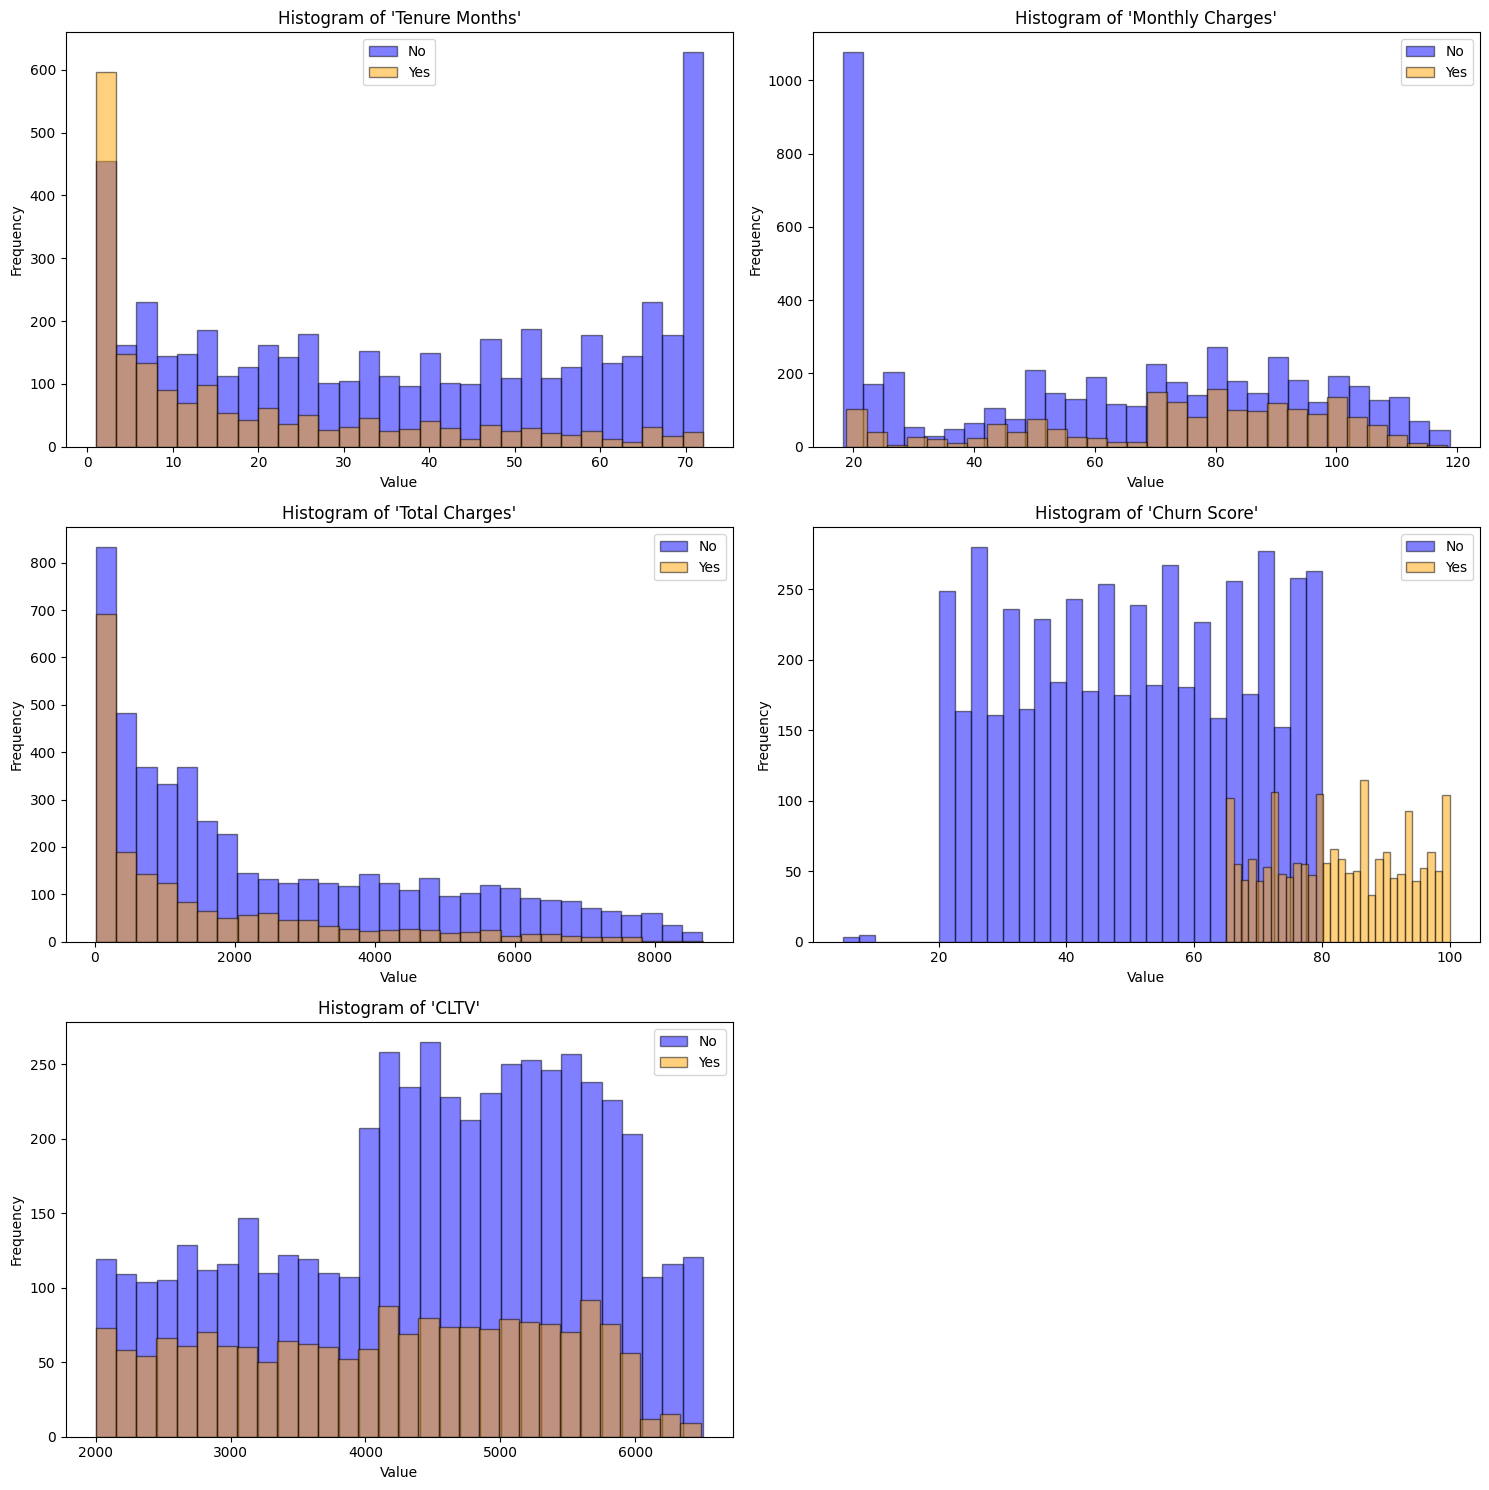

In [ ]:
import matplotlib.pyplot as plt
import math

data = df[['Tenure Months', 'Monthly Charges', 'Total Charges', 'Churn Score', 'CLTV']]

num_columns = len(data.columns)
num_rows = math.ceil(num_columns / 2)  # Calculate the number of rows needed for the subplots

fig, axes = plt.subplots(num_rows, 2, figsize=(15, num_rows*5))

for i, column in enumerate(data.columns):
    row = i // 2  # Calculate the row index for the subplot
    col = i % 2  # Calculate the column index for the subplot

    axes[row, col].hist(data.loc[df['Churn Value'] == 0, column], bins=30, color='blue', edgecolor='black', alpha=0.5, label='No')
    axes[row, col].hist(data.loc[df['Churn Value'] == 1, column], bins=30, color='orange', edgecolor='black', alpha=0.5, label='Yes')

    axes[row, col].set_title(f"Histogram of '{column}'")
    axes[row, col].set_xlabel("Value")
    axes[row, col].set_ylabel("Frequency")
    axes[row, col].legend()

# Remove any empty subplots if the number of columns is odd
if num_columns % 2 != 0:
    fig.delaxes(axes[num_rows-1, 1])

plt.tight_layout()  # Adjust the spacing between subplots
plt.show()


In [ ]:
# 요금 분포 확인
fig = px.histogram(df, x="Monthly Charges",color = 'Churn Value',marginal="box")
fig.show()

## Categorical Encoding

In [ ]:
# 범주형 변수 표시
cat_col = df.select_dtypes(include=['object']).columns

for cat in cat_col:
  print(cat)
  print(df[cat].unique())
  print("\n")

CustomerID
['3668-QPYBK' '9237-HQITU' '9305-CDSKC' ... '2234-XADUH' '4801-JZAZL'
 '3186-AJIEK']


City
['Los Angeles' 'Beverly Hills' 'Huntington Park' ... 'Tulelake'
 'Olympic Valley' 'Redcrest']


Gender
['Male' 'Female']


Senior Citizen
['No' 'Yes']


Partner
['No' 'Yes']


Dependents
['No' 'Yes']


Phone Service
['Yes' 'No']


Multiple Lines
['No' 'Yes' 'No phone service']


Internet Service
['DSL' 'Fiber optic' 'No']


Online Security
['Yes' 'No' 'No internet service']


Online Backup
['Yes' 'No' 'No internet service']


Device Protection
['No' 'Yes' 'No internet service']


Tech Support
['No' 'Yes' 'No internet service']


Streaming TV
['No' 'Yes' 'No internet service']


Streaming Movies
['No' 'Yes' 'No internet service']


Contract
['Month-to-month' 'Two year' 'One year']


Paperless Billing
['Yes' 'No']


Payment Method
['Mailed check' 'Electronic check' 'Bank transfer (automatic)'
 'Credit card (automatic)']


Churn Label
['Yes' 'No']


Churn Reason
['Competitor made better 

In [ ]:
# No Internet Service -> No로 대체 -> 인터넷 서비스 미사용자는 관련 서비스 이용 x
# Phone Service도 마찬가지
# Yes -> 1, No -> 0
# Male -> 1, No -> 0
for col in ['Internet Service', 'Online Security', 'Online Backup', 'Device Protection',
            'Tech Support', 'Streaming TV', 'Streaming Movies', 'Phone Service','Multiple Lines']:
    print(col, ":\n", df[col].value_counts(), "\n")

Internet Service :
 Fiber optic    3096
DSL            2416
No             1520
Name: Internet Service, dtype: int64 

Online Security :
 No                     3497
Yes                    2015
No internet service    1520
Name: Online Security, dtype: int64 

Online Backup :
 No                     3087
Yes                    2425
No internet service    1520
Name: Online Backup, dtype: int64 

Device Protection :
 No                     3094
Yes                    2418
No internet service    1520
Name: Device Protection, dtype: int64 

Tech Support :
 No                     3472
Yes                    2040
No internet service    1520
Name: Tech Support, dtype: int64 

Streaming TV :
 No                     2809
Yes                    2703
No internet service    1520
Name: Streaming TV, dtype: int64 

Streaming Movies :
 No                     2781
Yes                    2731
No internet service    1520
Name: Streaming Movies, dtype: int64 

Phone Service :
 Yes    6352
No      680
Name

In [ ]:
# Binary Encoding
df['Gender'] = df['Gender'].map({'Male': 1, 'Female': 0})

for col in ['Senior Citizen', 'Partner', 'Dependents', 'Phone Service', 'Paperless Billing']:
    df[col] = df[col].map({'Yes': 1, 'No': 0})

for col in ['Online Security', 'Online Backup', 'Device Protection',
            'Tech Support', 'Streaming TV', 'Streaming Movies']:
    df[col] = df[col].map({'Yes': 1, 'No': 0, 'No internet service': 0})

# Phone Service Encoding
df['Multiple Lines'] = df['Multiple Lines'].map({'Yes': 1, 'No': 0, 'No phone service': 0})

# Label Encoding
df = pd.get_dummies(df, columns=['Contract', 'Payment Method', 'Internet Service'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 36 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   CustomerID                                7043 non-null   object 
 1   City                                      7043 non-null   object 
 2   Zip Code                                  7043 non-null   int64  
 3   Latitude                                  7043 non-null   float64
 4   Longitude                                 7043 non-null   float64
 5   Gender                                    7043 non-null   int64  
 6   Senior Citizen                            7043 non-null   int64  
 7   Partner                                   7043 non-null   int64  
 8   Dependents                                7043 non-null   int64  
 9   Tenure Months                             7043 non-null   int64  
 10  Phone Service                       

## 시각화

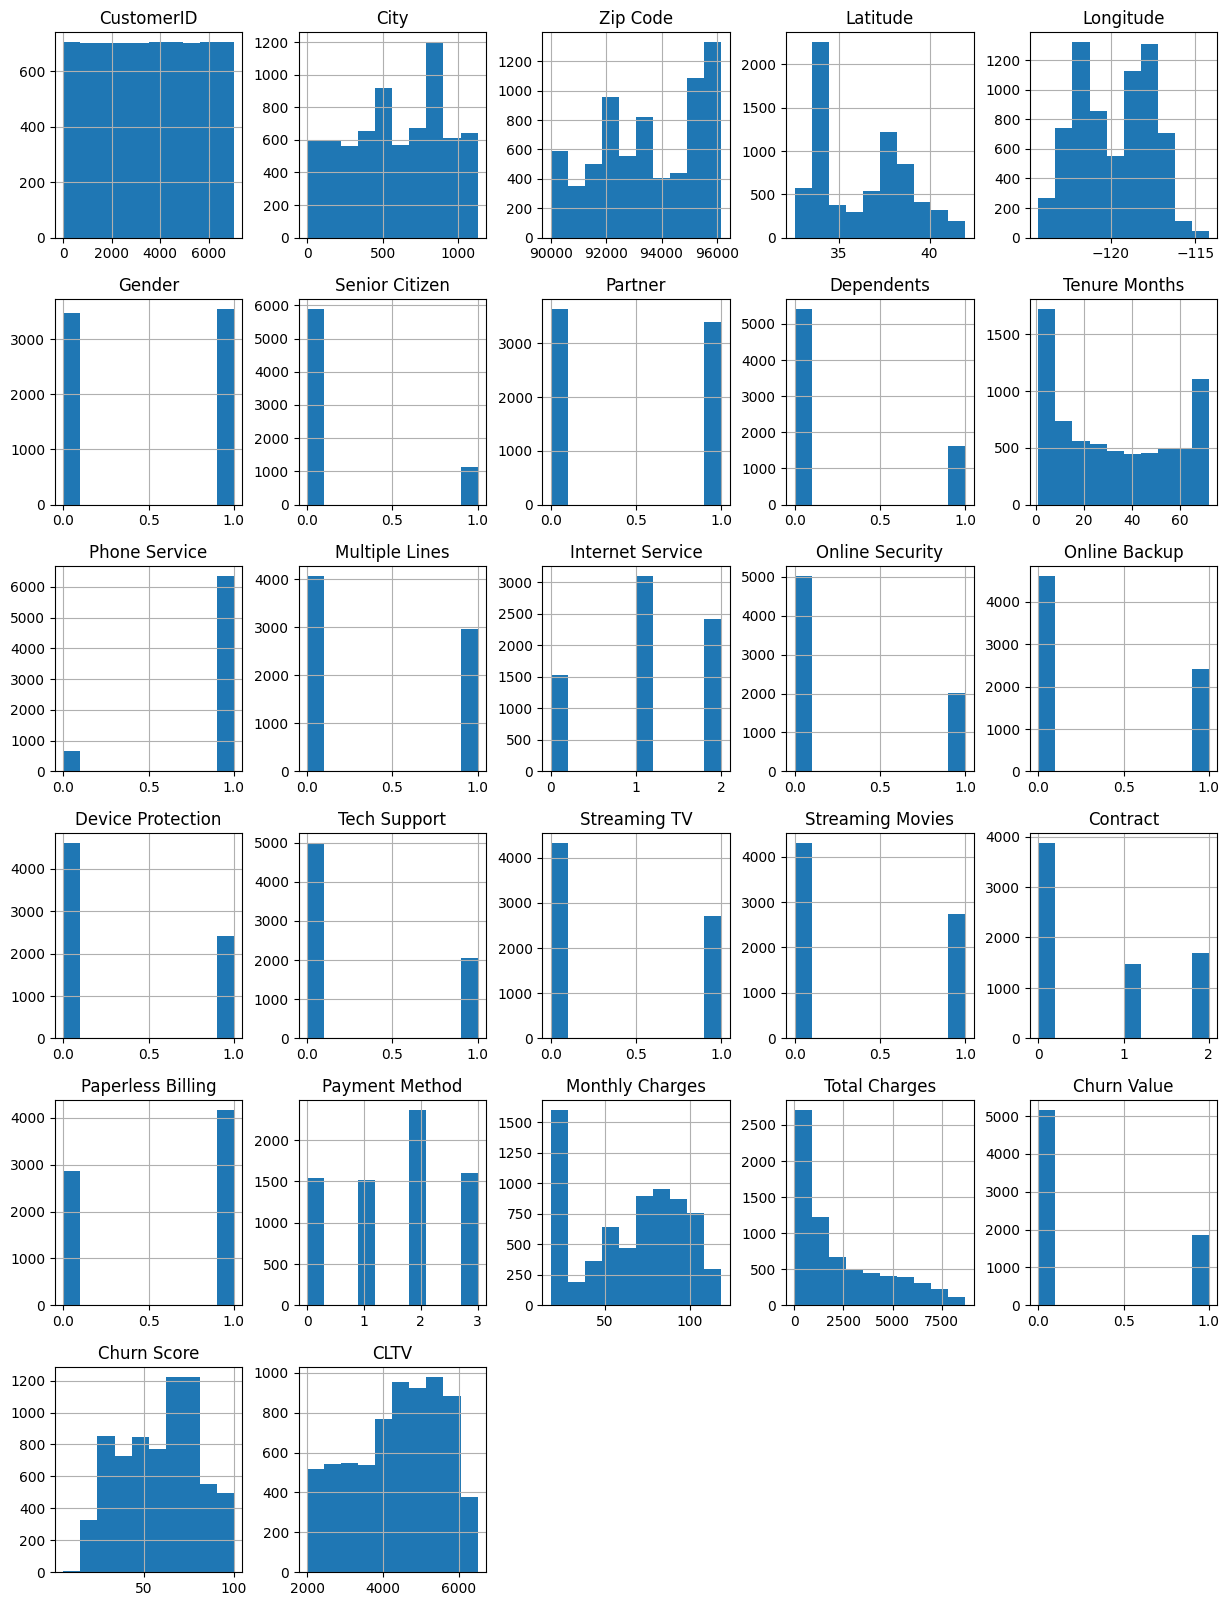

In [ ]:
# Hist 시각화
df.hist(figsize=(15, 20))
plt.show()

In [ ]:
for col in df.columns:
    print(col + " : " + str(df[col].nunique()))

CustomerID : 7032
City : 1129
Zip Code : 1652
Latitude : 1652
Longitude : 1651
Gender : 2
Senior Citizen : 2
Partner : 2
Dependents : 2
Tenure Months : 72
Phone Service : 2
Multiple Lines : 2
Internet Service : 3
Online Security : 2
Online Backup : 2
Device Protection : 2
Tech Support : 2
Streaming TV : 2
Streaming Movies : 2
Contract : 3
Paperless Billing : 2
Payment Method : 4
Monthly Charges : 1584
Total Charges : 6530
Churn Value : 2
Churn Score : 85
CLTV : 3435


<Axes: title={'center': 'Correlation of Features'}>

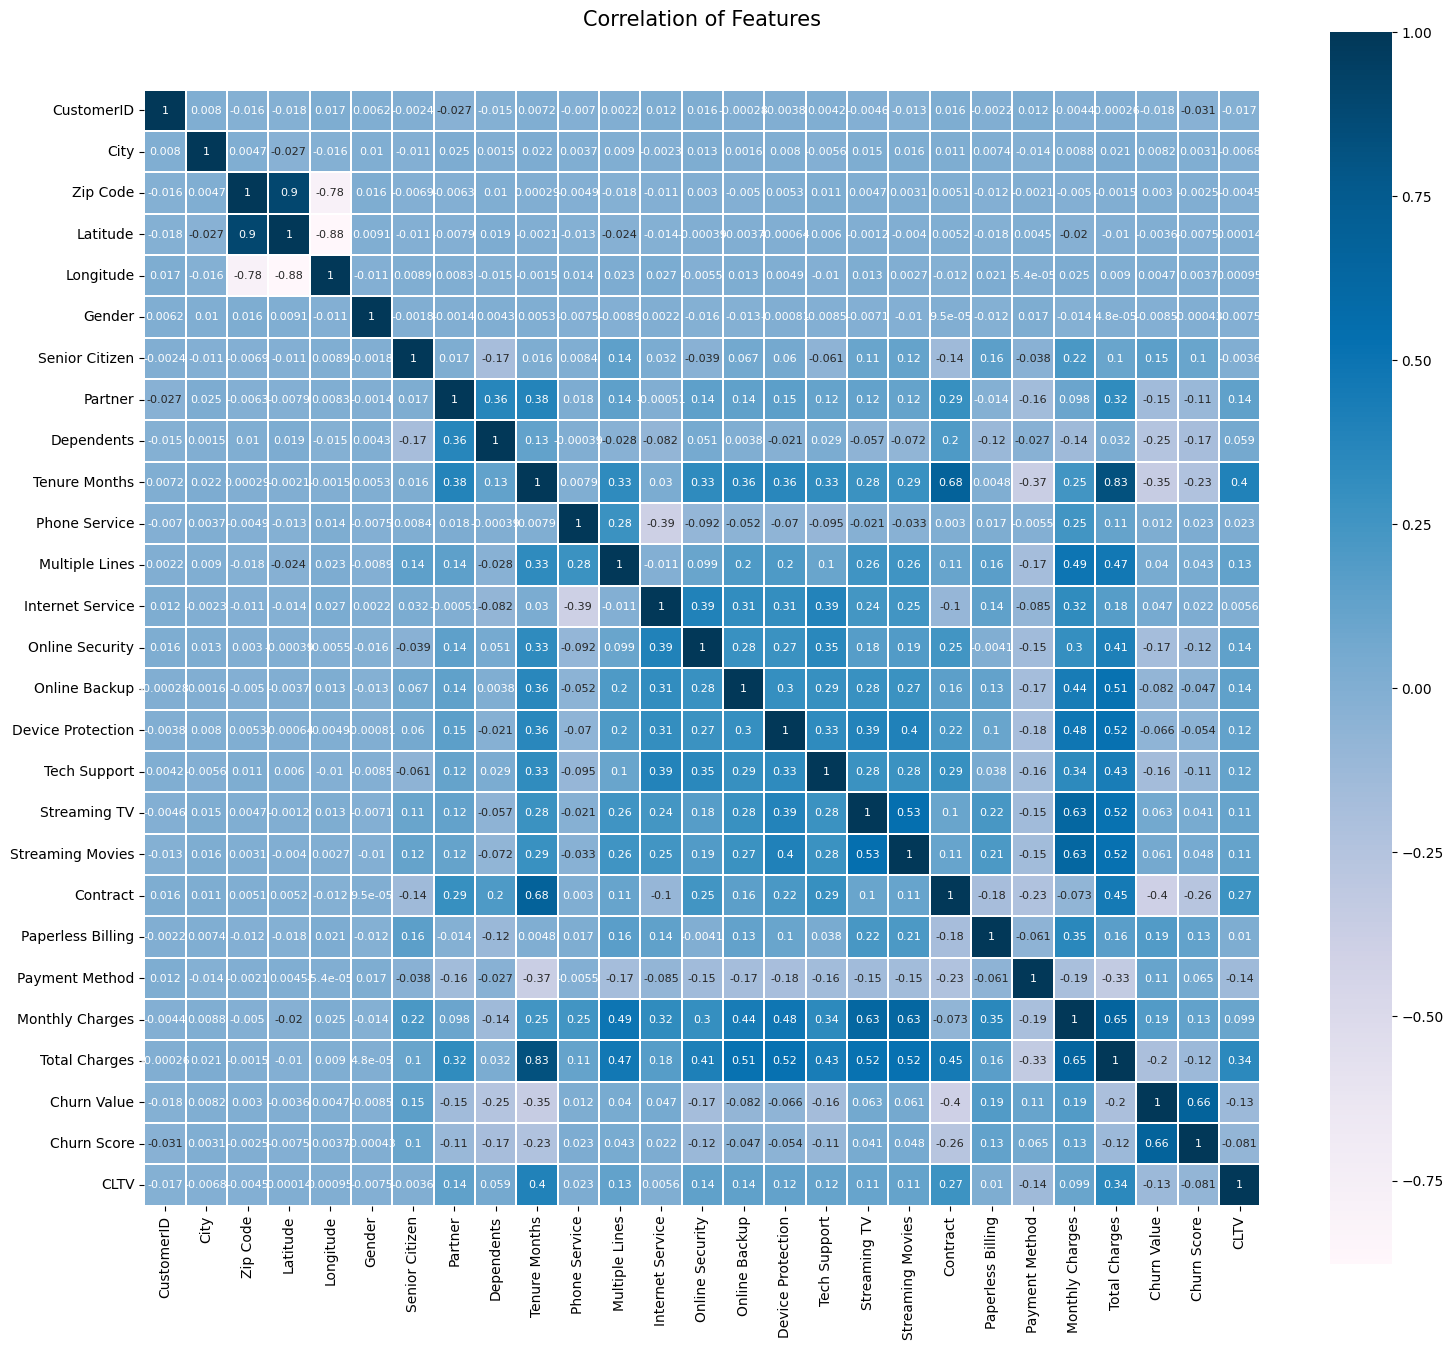

In [ ]:
# 상관관계 분석
# 0에 가까운 컬럼 제거
# CustomerID, Country, City, Zip Code, Latitude, Longitude, Churn Reason
colormap = plt.cm.PuBu
plt.figure(figsize=(18, 16))
plt.title("Correlation of Features", y=1.05, size=15)
sns.heatmap(df.corr(), linewidths=0.1, vmax=1.0,
           square=True, cmap=colormap, linecolor="white", annot=True, annot_kws={"size": 8})


# 이상치 제거

## Label split & Drop

In [ ]:
# Churn Label과 Churn Value 동일 컬럼 판별
# 갯수가 동일하기 때문에 Churn Label drop
df.loc[(df['Churn Label'] == 'Yes') & (df['Churn Value'] == 1), 'Churn Label']

0       Yes
1       Yes
2       Yes
3       Yes
4       Yes
       ... 
1864    Yes
1865    Yes
1866    Yes
1867    Yes
1868    Yes
Name: Churn Label, Length: 1869, dtype: object

In [ ]:
df[df['Churn Label'] == 'Yes']

CustomerID  City  Zip Code   Latitude   Longitude  Gender  \
0           2564   562     90003  33.964131 -118.272783       1   
1           6511   562     90005  34.059281 -118.307420       0   
2           6551   562     90006  34.048013 -118.293953       0   
3           5604   562     90010  34.062125 -118.315709       0   
4            174   562     90015  34.039224 -118.266293       1   
...          ...   ...       ...        ...         ...     ...   
1864        1155   736     92264  33.745746 -116.514215       1   
1865        6201   920     92273  32.790282 -115.689559       0   
1866        4893  1058     92280  34.264124 -114.717964       1   
1867         437  1091     92282  33.972293 -116.654195       0   
1868        5934    32     92307  34.550820 -117.122396       1   

      Senior Citizen  Partner  Dependents  Tenure Months  ...  \
0                  0        0           0              2  ...   
1                  0        0           1              2  ...   
2                  0        0           1              8  ...   
3                  0        1           1             28  ...   
4                  0        0           1             49  ...   
...              ...      ...         ...            ...  ...   
1864               0        0           0             12  ...   
1865               0        0           0              9  ...   
1866               1        0           0              1  ...   
1867               0        0           0             67  ...   
1868               1        1           0              4  ...   

      Streaming Movies  Contract  Paperless Billing  Payment Method  \
0                    0         0                  1               3   
1                    0         0                  1               2   
2                    1         0                  1               2   
3                    1         0                  1               2   
4                    1         0                  1               0   
...                ...       ...                ...             ...   
1864                 0         1                  1               2   
1865                 0         0                  1               0   
1866                 0         0                  1               2   
1867                 0         0                  1               1   
1868                 0         0                  1               3   

      Monthly Charges  Total Charges  Churn Label  Churn Value  Churn Score  \
0               53.85         108.15          Yes            1           86   
1               70.70         151.65          Yes            1           67   
2               99.65         820.50          Yes            1           86   
3              104.80        3046.05          Yes            1           84   
4              103.70        5036.30          Yes            1           89   
...               ...            ...          ...          ...          ...   
1864            59.80         727.80          Yes            1           69   
1865            44.20         403.35          Yes            1           87   
1866            75.75          75.75          Yes            1           97   
1867           102.95        6886.25          Yes            1           70   
1868            74.40         306.60          Yes            1           77   

      CLTV  
0     3239  
1     2701  
2     5372  
3     5003  
4     5340  
...    ...  
1864  4581  
1865  2029  
1866  5571  
1867  5620  
1868  5839  

[1869 rows x 28 columns]

In [ ]:
df[df['Churn Value'] == 1]

CustomerID  City  Zip Code   Latitude   Longitude  Gender  \
0           2564   562     90003  33.964131 -118.272783       1   
1           6511   562     90005  34.059281 -118.307420       0   
2           6551   562     90006  34.048013 -118.293953       0   
3           5604   562     90010  34.062125 -118.315709       0   
4            174   562     90015  34.039224 -118.266293       1   
...          ...   ...       ...        ...         ...     ...   
1864        1155   736     92264  33.745746 -116.514215       1   
1865        6201   920     92273  32.790282 -115.689559       0   
1866        4893  1058     92280  34.264124 -114.717964       1   
1867         437  1091     92282  33.972293 -116.654195       0   
1868        5934    32     92307  34.550820 -117.122396       1   

      Senior Citizen  Partner  Dependents  Tenure Months  ...  \
0                  0        0           0              2  ...   
1                  0        0           1              2  ...   
2                  0        0           1              8  ...   
3                  0        1           1             28  ...   
4                  0        0           1             49  ...   
...              ...      ...         ...            ...  ...   
1864               0        0           0             12  ...   
1865               0        0           0              9  ...   
1866               1        0           0              1  ...   
1867               0        0           0             67  ...   
1868               1        1           0              4  ...   

      Streaming Movies  Contract  Paperless Billing  Payment Method  \
0                    0         0                  1               3   
1                    0         0                  1               2   
2                    1         0                  1               2   
3                    1         0                  1               2   
4                    1         0                  1               0   
...                ...       ...                ...             ...   
1864                 0         1                  1               2   
1865                 0         0                  1               0   
1866                 0         0                  1               2   
1867                 0         0                  1               1   
1868                 0         0                  1               3   

      Monthly Charges  Total Charges  Churn Label  Churn Value  Churn Score  \
0               53.85         108.15          Yes            1           86   
1               70.70         151.65          Yes            1           67   
2               99.65         820.50          Yes            1           86   
3              104.80        3046.05          Yes            1           84   
4              103.70        5036.30          Yes            1           89   
...               ...            ...          ...          ...          ...   
1864            59.80         727.80          Yes            1           69   
1865            44.20         403.35          Yes            1           87   
1866            75.75          75.75          Yes            1           97   
1867           102.95        6886.25          Yes            1           70   
1868            74.40         306.60          Yes            1           77   

      CLTV  
0     3239  
1     2701  
2     5372  
3     5003  
4     5340  
...    ...  
1864  4581  
1865  2029  
1866  5571  
1867  5620  
1868  5839  

[1869 rows x 28 columns]

In [ ]:
df = df.drop('Churn Label', axis=1)

In [ ]:
df = df.drop('Churn Reason', axis=1)

In [ ]:
df = df.drop(['CustomerID', 'City', 'Zip Code', 'Latitude', 'Longitude', 'Churn Reason'], axis=1)

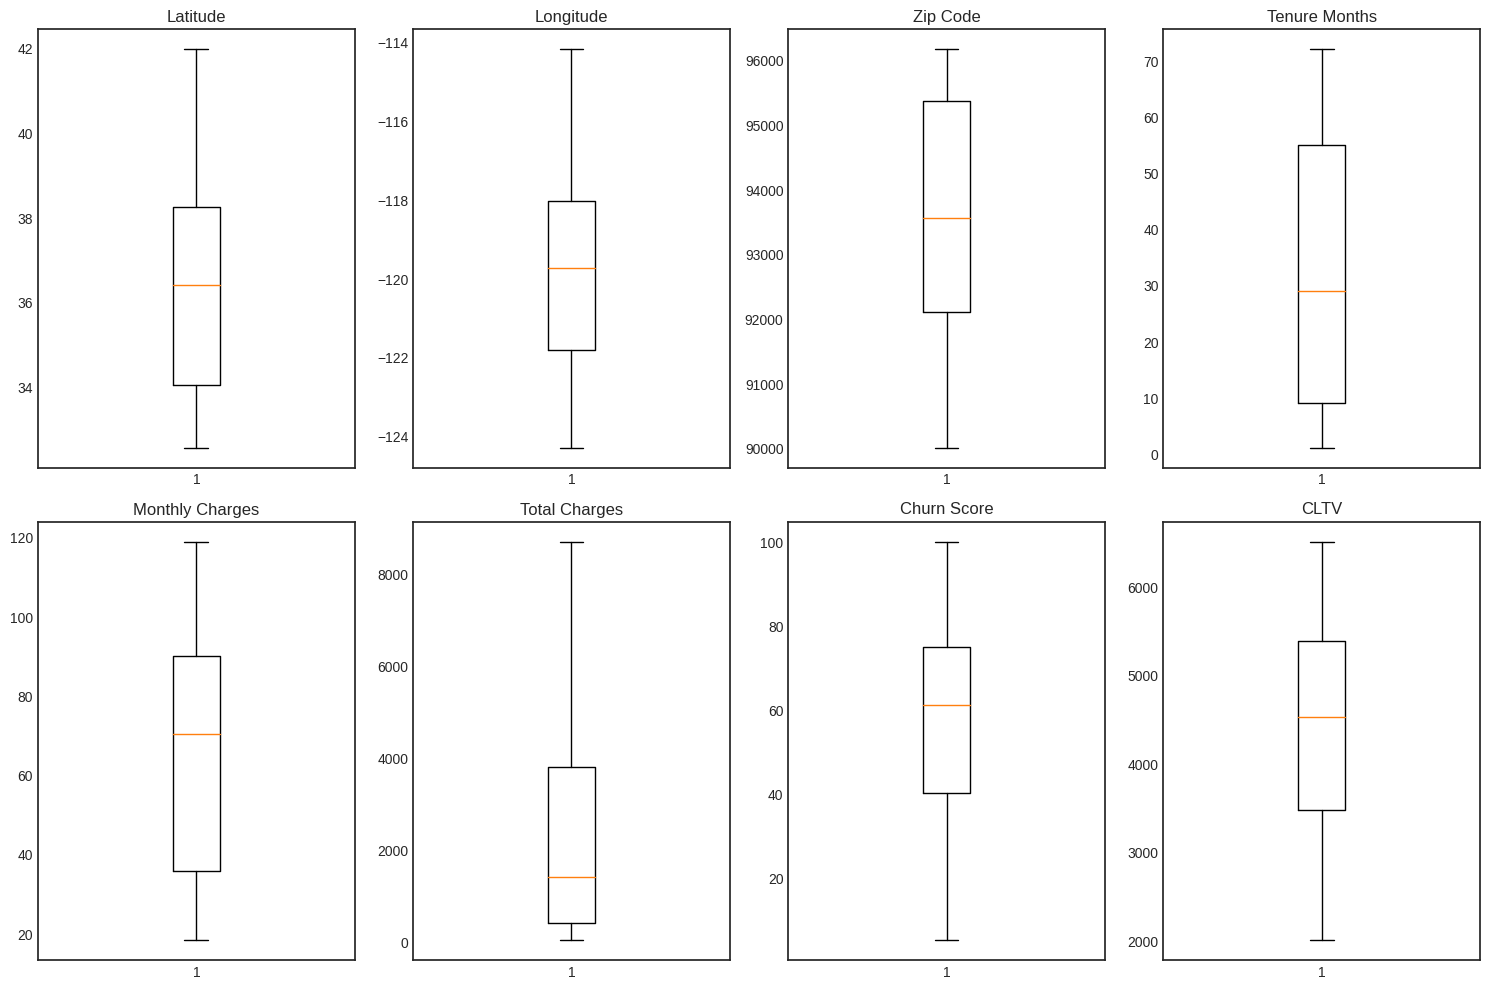

In [ ]:
plt.figure(figsize = (15, 10))
plt.style.use('seaborn-white')

# numerical data
col = ['Latitude', 'Longitude', 'Zip Code', 'Tenure Months', 'Monthly Charges', 'Total Charges','Churn Score', 'CLTV']

num = 1

for c in col:
    plt.subplot(2, 4, num)
    plt.boxplot(df[c])
    plt.title(c)
    num+=1

plt.tight_layout()

# Data processing
model data는 여기서 진행하면됨.

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/ML/Telco_customer_churn.csv')

# unique 컬럼 제거
df = df.drop(['Count','Country', 'State', 'Lat Long'], axis=1)

# 결측치 대체
df['Total Charges'] = df['Total Charges'].replace(' ', 0)
df['Total Charges'] = df['Total Charges'].astype(float)

df['calc_charges'] = df['Monthly Charges'] * df['Tenure Months']
df['diff_in_charges'] = df['Total Charges'] - df['calc_charges']

df['Total Charges'] = np.where(df['Total Charges'].isna() == True,df['calc_charges'], df['Total Charges'])

df = df.drop(['calc_charges','diff_in_charges'], axis=1)

In [ ]:
# Encoding
df['Gender'] = df['Gender'].map({'Male': 1, 'Female': 0})

for col in ['Senior Citizen', 'Partner', 'Dependents', 'Phone Service', 'Paperless Billing']:
    df[col] = df[col].map({'Yes': 1, 'No': 0})

for col in ['Online Security', 'Online Backup', 'Device Protection',
            'Tech Support', 'Streaming TV', 'Streaming Movies']:
    df[col] = df[col].map({'Yes': 1, 'No': 0, 'No internet service': 0})

# Phone Service Encoding
df['Multiple Lines'] = df['Multiple Lines'].map({'Yes': 1, 'No': 0, 'No phone service': 0})

# One-hot Encoding
df = pd.get_dummies(df, columns=['Contract', 'Payment Method', 'Internet Service'])

# 필요없는 컬럼
df = df.drop(['CustomerID', 'City', 'Zip Code', 'Latitude', 'Longitude', 'Churn Reason', 'Churn Label'], axis=1)

## CatBoost

In [ ]:
df_cat = pd.read_csv('/content/drive/MyDrive/ML/Telco_customer_churn.csv')

# unique 컬럼 제거
df_cat = df_cat.drop(['Count','Country', 'State', 'Lat Long'], axis=1)

# 결측치 대체
df_cat['Total Charges'] = df_cat['Total Charges'].replace(' ', 0)
df_cat['Total Charges'] = df_cat['Total Charges'].astype(float)

df_cat['calc_charges'] = df_cat['Monthly Charges'] * df_cat['Tenure Months']
df_cat['diff_in_charges'] = df_cat['Total Charges'] - df_cat['calc_charges']

df_cat['Total Charges'] = np.where(df_cat['Total Charges'].isna() == True,df_cat['calc_charges'], df_cat['Total Charges'])

df_cat = df_cat.drop(['calc_charges','diff_in_charges'], axis=1)

In [ ]:
# 필요없는 컬럼
df_cat = df_cat.drop(['CustomerID', 'City', 'Zip Code', 'Latitude', 'Longitude', 'Churn Reason', 'Churn Label', 'Gender'], axis=1)

# Scaling

In [ ]:
# Scaling을 위한 복사
df2 = df.copy()

In [ ]:
# 스케일링할 컬럼 선택 -> 수치형 변수
cols_to_scale = ['Tenure Months', 'Monthly Charges', 'Churn Score', 'Total Charges', 'CLTV']

# StandardScaler 객체 생성 후 fit & transform 수행
sdscaler = StandardScaler()
df[cols_to_scale] = sdscaler.fit_transform(df[cols_to_scale])

# 데이터 프레임으로 저장
stdscaled_df = df

# MinMaxScaler 객체 생성 후 fit & transform 수행
mMscaler = MinMaxScaler()
df2[cols_to_scale] = mMscaler.fit_transform(df2[cols_to_scale])

# 데이터 프레임으로 저장
mMscaled_df = df2

In [ ]:
cols_to_scale = ['Tenure Months', 'Monthly Charges', 'Churn Score', 'Total Charges', 'CLTV']
stdscaled_df[cols_to_scale].describe()

Tenure Months  Monthly Charges   Churn Score  Total Charges  \
count   7.043000e+03     7.043000e+03  7.043000e+03   7.043000e+03   
mean   -1.614182e-17    -5.649637e-17  1.291346e-16  -4.842546e-17   
std     1.000071e+00     1.000071e+00  1.000071e+00   1.000071e+00   
min    -1.318165e+00    -1.545860e+00 -2.494908e+00  -1.005780e+00   
25%    -9.516817e-01    -9.725399e-01 -8.687866e-01  -8.299464e-01   
50%    -1.372744e-01     1.857327e-01  1.068865e-01  -3.905282e-01   
75%     9.214551e-01     8.338335e-01  7.573352e-01   6.648034e-01   
max     1.613701e+00     1.794352e+00  1.918851e+00   2.825806e+00   

               CLTV  
count  7.043000e+03  
mean  -2.824818e-16  
std    1.000071e+00  
min   -2.026501e+00  
25%   -7.872501e-01  
50%    1.071066e-01  
75%    8.285938e-01  
max    1.774938e+00

In [ ]:
cols_to_scale = ['Tenure Months', 'Monthly Charges', 'Churn Score', 'Total Charges', 'CLTV']
mMscaled_df[cols_to_scale].describe()

Tenure Months  Monthly Charges  Churn Score  Total Charges         CLTV
count    7043.000000      7043.000000  7043.000000    7043.000000  7043.000000
mean        0.449599         0.462803     0.565257       0.262497     0.533088
std         0.341104         0.299403     0.226580       0.261007     0.263077
min         0.000000         0.000000     0.000000       0.000000     0.000000
25%         0.125000         0.171642     0.368421       0.045891     0.325995
50%         0.402778         0.518408     0.589474       0.160574     0.561263
75%         0.763889         0.712438     0.736842       0.436003     0.751056
max         1.000000         1.000000     1.000000       1.000000     1.000000

<Axes: title={'center': 'Correlation of Features Standard'}>

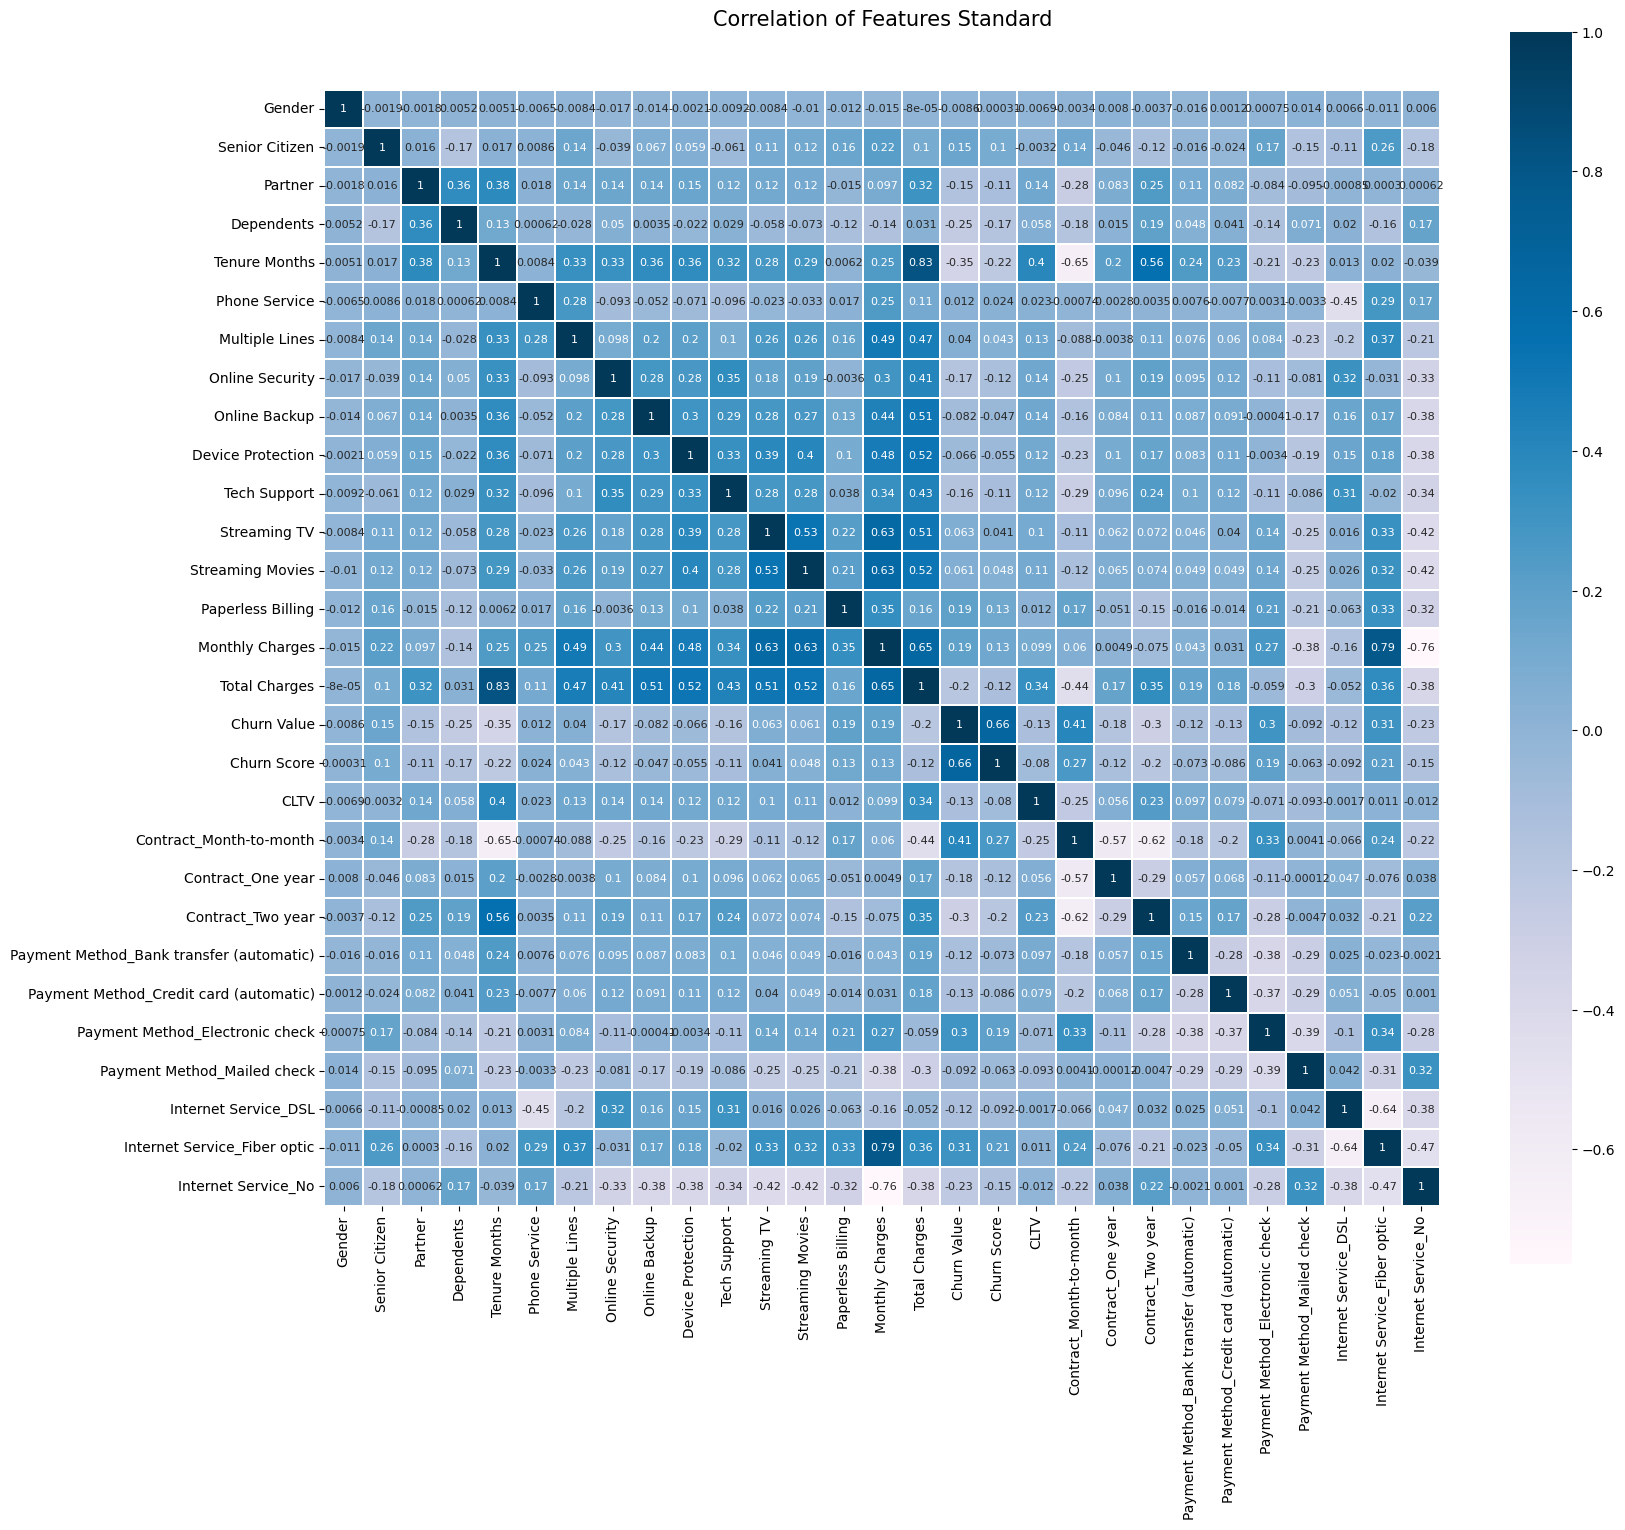

In [ ]:
# 상관관계 분석
colormap = plt.cm.PuBu
plt.figure(figsize=(18, 16))
plt.title("Correlation of Features Standard", y=1.05, size=15)
sns.heatmap(df.corr(), linewidths=0.1, vmax=1.0,
           square=True, cmap=colormap, linecolor="white", annot=True, annot_kws={"size": 8})

# 같은 데이터로 Scaling을 했기 때문에, 다른 Scaling data도 같은 matrix가 나옴

In [ ]:
# Gender를 제외하고 변수간 상관성이 존재함. -> Gender drop
stdscaled_df = stdscaled_df.drop('Gender', axis=1)
mMscaled_df = mMscaled_df.drop('Gender', axis=1)

# PCA Elbow Point

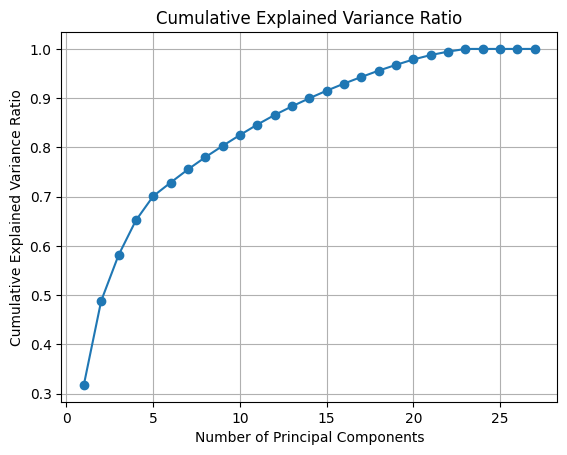

In [ ]:
# Perform PCA
# PCA 시, 각 차원 수별 cumulative_var_ratio 확인
pca = PCA()
pca.fit(stdscaled_df)

# Calculate the cumulative explained variance ratio
cumulative_var_ratio = np.cumsum(pca.explained_variance_ratio_)

# Plot the cumulative explained variance ratio
plt.plot(range(1, len(cumulative_var_ratio) + 1), cumulative_var_ratio, marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Cumulative Explained Variance Ratio')
plt.grid(True)
plt.show()

In [ ]:
mMscaled_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 28 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Gender                                    7043 non-null   int64  
 1   Senior Citizen                            7043 non-null   int64  
 2   Partner                                   7043 non-null   int64  
 3   Dependents                                7043 non-null   int64  
 4   Tenure Months                             7043 non-null   float64
 5   Phone Service                             7043 non-null   int64  
 6   Multiple Lines                            7043 non-null   int64  
 7   Online Security                           7043 non-null   int64  
 8   Online Backup                             7043 non-null   int64  
 9   Device Protection                         7043 non-null   int64  
 10  Tech Support                        

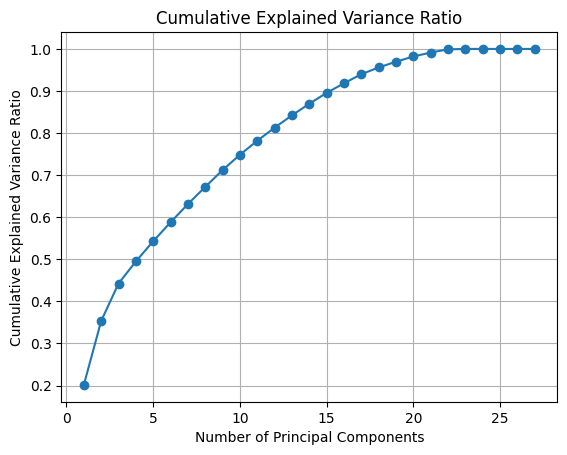

In [ ]:
# Perform PCA
pca = PCA()
pca.fit(mMscaled_df)

# Calculate the cumulative explained variance ratio
cumulative_var_ratio = np.cumsum(pca.explained_variance_ratio_)

# Plot the cumulative explained variance ratio
plt.plot(range(1, len(cumulative_var_ratio) + 1), cumulative_var_ratio, marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Cumulative Explained Variance Ratio')
plt.grid(True)
plt.show()

# Data PCA


## Standard Scaling

In [ ]:
# Define PCA
pca = PCA()

# 차원축소
pca_stdscaled_df = pca.fit_transform(stdscaled_df)

# 주성분 벡터의 가중치 확인
column_contributions = np.abs(pca.components_)

# Calculate the cumulative explained variance ratio
cumulative_var_ratio = np.cumsum(pca.explained_variance_ratio_)

# 기존에 사용한 stdscaled_df 데이터프레임에서 컬럼명 가져오기
original_columns = stdscaled_df.columns

# 각 컬럼의 설명력과 기여도 출력
for i, (explained_variance_ratio, column_contribution) in enumerate(zip(cumulative_var_ratio, column_contributions)):
    print(f"Explained Variance up to Dimension {i+1}: {explained_variance_ratio:.2f}")

    # 기여도 및 컬럼 이름 함께 정렬
    sorted_columns = sorted(zip(original_columns, column_contribution), key=lambda x: x[1], reverse=True)

    # 정렬된 기여도를 기반으로 기여도 및 컬럼 이름 출력
    for col_name, contrib in sorted_columns:
        print(f"{col_name} Contribution: {contrib:.4f}")
    print()


Explained Variance up to Dimension 1: 0.32
Total Charges Contribution: 0.5561
Tenure Months Contribution: 0.4718
Monthly Charges Contribution: 0.4149
CLTV Contribution: 0.2619
Streaming Movies Contribution: 0.1611
Streaming TV Contribution: 0.1596
Device Protection Contribution: 0.1532
Online Backup Contribution: 0.1454
Multiple Lines Contribution: 0.1428
Contract_Month-to-month Contribution: 0.1299
Tech Support Contribution: 0.1204
Internet Service_Fiber optic Contribution: 0.1155
Online Security Contribution: 0.1126
Internet Service_No Contribution: 0.1057
Partner Contribution: 0.0985
Contract_Two year Contribution: 0.0905
Payment Method_Mailed check Contribution: 0.0883
Churn Score Contribution: 0.0800
Paperless Billing Contribution: 0.0562
Payment Method_Bank transfer (automatic) Contribution: 0.0484
Payment Method_Credit card (automatic) Contribution: 0.0461
Contract_One year Contribution: 0.0393
Senior Citizen Contribution: 0.0253
Phone Service Contribution: 0.0186
Internet Servi

In [ ]:
# 15차원으로 축소
# 노인, 인터넷 서비스, 계약, 지불방법에 대한 내용을 고루 포함하고 있음
# 또 초반에 churn reason에 포함된 서비스 불만족을 유추할 수 있는 tech support가 높게 반영됨
# 따라서 15차원 축소

## MinMax Scaling

In [ ]:
# Define PCA
pca = PCA()

# 차원축소
pca_mMscaled_df = pca.fit_transform(mMscaled_df)

# 주성분 벡터의 가중치 확인
column_contributions = np.abs(pca.components_)

# Calculate the cumulative explained variance ratio
cumulative_var_ratio = np.cumsum(pca.explained_variance_ratio_)

# 기존에 사용한 stdscaled_df 데이터프레임에서 컬럼명 가져오기
original_columns = stdscaled_df.columns

# 각 컬럼의 설명력과 기여도 출력
for i, (explained_variance_ratio, column_contribution) in enumerate(zip(cumulative_var_ratio, column_contributions)):
    print(f"Explained Variance up to Dimension {i+1}: {explained_variance_ratio:.2f}")

    # 기여도 및 컬럼 이름 함께 정렬
    sorted_columns = sorted(zip(original_columns, column_contribution), key=lambda x: x[1], reverse=True)

    # 정렬된 기여도를 기반으로 기여도 및 컬럼 이름 출력
    for col_name, contrib in sorted_columns:
        print(f"{col_name} Contribution: {contrib:.4f}")
    print()


Explained Variance up to Dimension 1: 0.19
Streaming Movies Contribution: 0.3428
Streaming TV Contribution: 0.3409
Device Protection Contribution: 0.3065
Online Backup Contribution: 0.2751
Internet Service_No Contribution: 0.2676
Monthly Charges Contribution: 0.2627
Multiple Lines Contribution: 0.2587
Internet Service_Fiber optic Contribution: 0.2519
Tech Support Contribution: 0.2293
Total Charges Contribution: 0.2237
Tenure Months Contribution: 0.2014
Online Security Contribution: 0.1992
Payment Method_Mailed check Contribution: 0.1957
Paperless Billing Contribution: 0.1667
Partner Contribution: 0.1500
Contract_Month-to-month Contribution: 0.1441
Contract_Two year Contribution: 0.0900
Senior Citizen Contribution: 0.0683
Payment Method_Bank transfer (automatic) Contribution: 0.0666
Payment Method_Credit card (automatic) Contribution: 0.0660
CLTV Contribution: 0.0640
Payment Method_Electronic check Contribution: 0.0631
Contract_One year Contribution: 0.0541
Dependents Contribution: 0.01

In [ ]:
# 19차원 축소
# 타 차원 대비 우리가 유의하게 생각한 변수를 가장 많이 포함
# 인터넷 서비스, 계약, 지불방법에 대해 다룸

## PCA

In [ ]:
pca_stdscaled_df = stdscaled_df.copy()
pca_mMscaled_df = mMscaled_df.copy()

pca_stdscaled_df_target = pca_stdscaled_df['Churn Value']
pca_mMscaled_target = pca_mMscaled_df['Churn Value']

pca_stdscaled_df = pca_stdscaled_df.drop('Churn Value', axis=1)
pca_mMscaled_df = pca_mMscaled_df.drop('Churn Value', axis=1)

# 데이터 차원 축소
pca = PCA(n_components=15)
pca_stdscaled_df = pca.fit_transform(stdscaled_df)

column_names_std = ['x{}'.format(i) for i in range(1, 16)]

# 데이터 차원 축소
pca = PCA(n_components=19)
pca_mMscaled_df = pca.fit_transform(mMscaled_df)

column_names_mM = ['x{}'.format(i) for i in range(1, 20)]

In [ ]:
# 결과를 데이터프레임으로 변환
pca_stdscaled_df = pd.DataFrame(data=pca_stdscaled_df, columns=column_names_std)
pca_mMscaled_df = pd.DataFrame(data=pca_mMscaled_df, columns=column_names_mM)

# Modeling

In [ ]:
!pip install CatBoost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.6/98.6 MB 2.2 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np

from sklearn.model_selection import KFold, train_test_split
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

## OverSampling

In [ ]:
from imblearn.over_sampling import SMOTE

# SMOTE를 사용하여 오버샘플링 수행
smote = SMOTE(random_state=2023)
stdscaled_df, std_target = smote.fit_resample(stdscaled_df, stdscaled_df['Churn Value'])
mMscaled_df, mM_target = smote.fit_resample(mMscaled_df, mMscaled_df['Churn Value'])
df_cat, df_cat_target = smote.fit_resample(df_cat, df_cat['Churn Value'])

print("minMax", mMscaled_df.groupby('Churn Value')['Churn Value'].count())
print("standard", stdscaled_df.groupby('Churn Value')['Churn Value'].count())
print("catboost", df_cat.groupby('Churn Value')['Churn Value'].count())

minMax Churn Value
0    5174
1    5174
Name: Churn Value, dtype: int64
standard Churn Value
0    5174
1    5174
Name: Churn Value, dtype: int64


In [ ]:
stdscaled_df = stdscaled_df.drop('Churn Value', axis=1)
mMscaled_df = mMscaled_df.drop('Churn Value', axis=1)

## Standard Model

In [ ]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix
from imblearn.over_sampling import SMOTE
from catboost import CatBoostClassifier
import pickle

random_state = 2023

# 데이터 로드
X = stdscaled_df
y = std_target

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2023)

# define model
models = {
    'GBM': GradientBoostingClassifier(random_state=random_state),
    'XGBoost': XGBClassifier(random_state=random_state, task_type='GPU'),
    'LightGBM': LGBMClassifier(random_state=random_state),
    'RandomForest': RandomForestClassifier(random_state=random_state)
}


# 출력함수 정의
def print_results(y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    matrix = confusion_matrix(y_true, y_pred)

    print("Accuracy: {:.2f}".format(accuracy))
    print("Recall: {:.2f}".format(recall))
    print("Precision: {:.2f}".format(precision))
    print("F1-Score: {:.2f}".format(f1))
    print("Confusion Matrix:\n", matrix)
    print("\n")

# StratifiedKFold 정의
skf = StratifiedKFold(n_splits=5, random_state=2023, shuffle=True)

for model_name, model in models.items():
    print("Model:", model_name)
    fold = 1
    for train_index, val_index in skf.split(X_train, y_train):
        print("Fold:", fold)
        X_train_fold, X_val_fold = X_train.iloc[train_index], X_train.iloc[val_index]
        y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]

        # Train the model
        model.fit(X_train_fold, y_train_fold)

        # Predict on validation fold
        y_val_pred = model.predict(X_val_fold)

        # Print evaluation metrics for the fold
        print_results(y_val_fold, y_val_pred)

        fold += 1

    # Predict on the test set
    y_test_pred = model.predict(X_test)

    # Print evaluation metrics for the test set
    print("Final Test Results for", model_name)
    print_results(y_test, y_test_pred)

Model: GBM
Fold: 1
Accuracy: 0.94
Recall: 0.96
Precision: 0.92
F1-Score: 0.94
Confusion Matrix:
 [[676  56]
 [ 29 688]]


Fold: 2
Accuracy: 0.94
Recall: 0.94
Precision: 0.93
F1-Score: 0.94
Confusion Matrix:
 [[685  47]
 [ 41 676]]


Fold: 3
Accuracy: 0.94
Recall: 0.95
Precision: 0.94
F1-Score: 0.94
Confusion Matrix:
 [[686  46]
 [ 35 682]]


Fold: 4
Accuracy: 0.94
Recall: 0.97
Precision: 0.93
F1-Score: 0.94
Confusion Matrix:
 [[676  56]
 [ 25 691]]


Fold: 5
Accuracy: 0.95
Recall: 0.97
Precision: 0.94
F1-Score: 0.95
Confusion Matrix:
 [[684  48]
 [ 20 696]]


Final Test Results for GBM
Accuracy: 0.94
Recall: 0.96
Precision: 0.92
F1-Score: 0.94
Confusion Matrix:
 [[1379  135]
 [  64 1527]]


Model: XGBoost
Fold: 1
[13:37:32] WARNING: ../src/learner.cc:767: 
Parameters: { "task_type" } are not used.

Accuracy: 0.94
Recall: 0.95
Precision: 0.93
F1-Score: 0.94
Confusion Matrix:
 [[681  51]
 [ 36 681]]


Fold: 2
[13:37:36] WARNING: ../src/learner.cc:767: 
Parameters: { "task_type" } are not

## MinMax Model

In [ ]:
random_state = 2023

# 데이터 로드
X = mMscaled_df
y = mM_target

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2023)

# define model
models = {
    'GBM': GradientBoostingClassifier(random_state=random_state),
    'XGBoost': XGBClassifier(random_state=random_state, task_type='GPU'),
    'LightGBM': LGBMClassifier(random_state=random_state),
    'RandomForest': RandomForestClassifier(random_state=random_state)
}


# 출력함수 정의
def print_results(y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    matrix = confusion_matrix(y_true, y_pred)

    print("Accuracy: {:.2f}".format(accuracy))
    print("Recall: {:.2f}".format(recall))
    print("Precision: {:.2f}".format(precision))
    print("F1-Score: {:.2f}".format(f1))
    print("Confusion Matrix:\n", matrix)
    print("\n")

# StratifiedKFold 정의
skf = StratifiedKFold(n_splits=5, random_state=2023, shuffle=True)

for model_name, model in models.items():
    print("Model:", model_name)
    fold = 1
    for train_index, val_index in skf.split(X_train, y_train):
        print("Fold:", fold)
        X_train_fold, X_val_fold = X_train.iloc[train_index], X_train.iloc[val_index]
        y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]

        # Train the model
        model.fit(X_train_fold, y_train_fold)

        # Predict on validation fold
        y_val_pred = model.predict(X_val_fold)

        # Print evaluation metrics for the fold
        print_results(y_val_fold, y_val_pred)

        fold += 1

    # Predict on the test set
    y_test_pred = model.predict(X_test)

    # Print evaluation metrics for the test set
    print("Final Test Results for", model_name)
    print_results(y_test, y_test_pred)

Model: GBM
Fold: 1
Accuracy: 0.94
Recall: 0.96
Precision: 0.92
F1-Score: 0.94
Confusion Matrix:
 [[676  56]
 [ 31 686]]


Fold: 2
Accuracy: 0.94
Recall: 0.95
Precision: 0.94
F1-Score: 0.94
Confusion Matrix:
 [[685  47]
 [ 37 680]]


Fold: 3
Accuracy: 0.94
Recall: 0.95
Precision: 0.94
F1-Score: 0.94
Confusion Matrix:
 [[685  47]
 [ 36 681]]


Fold: 4
Accuracy: 0.94
Recall: 0.96
Precision: 0.92
F1-Score: 0.94
Confusion Matrix:
 [[674  58]
 [ 30 686]]


Fold: 5
Accuracy: 0.95
Recall: 0.97
Precision: 0.94
F1-Score: 0.95
Confusion Matrix:
 [[684  48]
 [ 22 694]]


Final Test Results for GBM
Accuracy: 0.93
Recall: 0.96
Precision: 0.92
F1-Score: 0.94
Confusion Matrix:
 [[1380  134]
 [  70 1521]]


Model: XGBoost
Fold: 1
[13:38:02] WARNING: ../src/learner.cc:767: 
Parameters: { "task_type" } are not used.

Accuracy: 0.94
Recall: 0.95
Precision: 0.93
F1-Score: 0.94
Confusion Matrix:
 [[684  48]
 [ 37 680]]


Fold: 2
[13:38:05] WARNING: ../src/learner.cc:767: 
Parameters: { "task_type" } are not

## PCA Standard Model

In [ ]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix
from imblearn.over_sampling import SMOTE

random_state = 2023

# 데이터 로드
X = pca_stdscaled_df
y = pca_stdscaled_df_target

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2023)

# define model
models = {
    'GBM': GradientBoostingClassifier(random_state=random_state),
    'XGBoost': XGBClassifier(random_state=random_state, task_type='GPU'),
    'LightGBM': LGBMClassifier(random_state=random_state),
    'RandomForest': RandomForestClassifier(random_state=random_state)
}


# 출력함수 정의
def print_results(y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    matrix = confusion_matrix(y_true, y_pred)

    print("Accuracy: {:.2f}".format(accuracy))
    print("Recall: {:.2f}".format(recall))
    print("Precision: {:.2f}".format(precision))
    print("F1-Score: {:.2f}".format(f1))
    print("Confusion Matrix:\n", matrix)
    print("\n")

# StratifiedKFold 정의
skf = StratifiedKFold(n_splits=5, random_state=2023, shuffle=True)

for model_name, model in models.items():
    print("Model:", model_name)
    fold = 1
    for train_index, val_index in skf.split(X_train, y_train):
        print("Fold:", fold)
        X_train_fold, X_val_fold = X_train.iloc[train_index], X_train.iloc[val_index]
        y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]

        # Train the model
        model.fit(X_train_fold, y_train_fold)

        # Predict on validation fold
        y_val_pred = model.predict(X_val_fold)

        # Print evaluation metrics for the fold
        print_results(y_val_fold, y_val_pred)

        fold += 1

    # Predict on the test set
    y_test_pred = model.predict(X_test)

    # Print evaluation metrics for the test set
    print("Final Test Results for", model_name)
    print_results(y_test, y_test_pred)

Model: GBM
Fold: 1
Accuracy: 0.95
Recall: 0.89
Precision: 0.91
F1-Score: 0.90
Confusion Matrix:
 [[698  23]
 [ 29 236]]


Fold: 2
Accuracy: 0.96
Recall: 0.95
Precision: 0.89
F1-Score: 0.92
Confusion Matrix:
 [[691  30]
 [ 13 252]]


Fold: 3
Accuracy: 0.93
Recall: 0.84
Precision: 0.88
F1-Score: 0.86
Confusion Matrix:
 [[692  29]
 [ 42 223]]


Fold: 4
Accuracy: 0.96
Recall: 0.91
Precision: 0.93
F1-Score: 0.92
Confusion Matrix:
 [[701  19]
 [ 25 241]]


Fold: 5
Accuracy: 0.95
Recall: 0.89
Precision: 0.91
F1-Score: 0.90
Confusion Matrix:
 [[696  24]
 [ 30 236]]


Final Test Results for GBM
Accuracy: 0.94
Recall: 0.88
Precision: 0.90
F1-Score: 0.89
Confusion Matrix:
 [[1516   55]
 [  65  477]]


Model: XGBoost
Fold: 1
[08:02:47] WARNING: ../src/learner.cc:767: 
Parameters: { "task_type" } are not used.

Accuracy: 0.95
Recall: 0.91
Precision: 0.91
F1-Score: 0.91
Confusion Matrix:
 [[697  24]
 [ 24 241]]


Fold: 2
[08:02:48] WARNING: ../src/learner.cc:767: 
Parameters: { "task_type" } are not

## PCA MinMax Model

In [ ]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix

random_state = 2023

# 데이터 로드
X = pca_mMscaled_df
y = pca_mMscaled_target

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2023)

# define model
models = {
    'GBM': GradientBoostingClassifier(random_state=random_state),
    'XGBoost': XGBClassifier(random_state=random_state, task_type='GPU'),
    'LightGBM': LGBMClassifier(random_state=random_state),
    'RandomForest': RandomForestClassifier(random_state=random_state)
}


# 출력함수 정의
def print_results(y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    matrix = confusion_matrix(y_true, y_pred)

    print("Accuracy: {:.2f}".format(accuracy))
    print("Recall: {:.2f}".format(recall))
    print("Precision: {:.2f}".format(precision))
    print("F1-Score: {:.2f}".format(f1))
    print("Confusion Matrix:\n", matrix)
    print("\n")

# StratifiedKFold 정의
skf = StratifiedKFold(n_splits=5, random_state=2023, shuffle=True)

for model_name, model in models.items():
    print("Model:", model_name)
    fold = 1
    for train_index, val_index in skf.split(X_train, y_train):
        print("Fold:", fold)
        X_train_fold, X_val_fold = X_train.iloc[train_index], X_train.iloc[val_index]
        y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]

        # Train the model
        model.fit(X_train_fold, y_train_fold)

        # Predict on validation fold
        y_val_pred = model.predict(X_val_fold)

        # Print evaluation metrics for the fold
        print_results(y_val_fold, y_val_pred)

        fold += 1

    # Predict on the test set
    y_test_pred = model.predict(X_test)

    # Print evaluation metrics for the test set
    print("Final Test Results for", model_name)
    print_results(y_test, y_test_pred)

Model: GBM
Fold: 1
Accuracy: 0.99
Recall: 0.98
Precision: 0.99
F1-Score: 0.99
Confusion Matrix:
 [[719   2]
 [  5 260]]


Fold: 2
Accuracy: 0.99
Recall: 0.96
Precision: 1.00
F1-Score: 0.98
Confusion Matrix:
 [[721   0]
 [ 10 255]]


Fold: 3
Accuracy: 0.99
Recall: 0.98
Precision: 1.00
F1-Score: 0.99
Confusion Matrix:
 [[721   0]
 [  5 260]]


Fold: 4
Accuracy: 1.00
Recall: 0.99
Precision: 1.00
F1-Score: 0.99
Confusion Matrix:
 [[720   0]
 [  3 263]]


Fold: 5
Accuracy: 0.99
Recall: 0.98
Precision: 1.00
F1-Score: 0.99
Confusion Matrix:
 [[720   0]
 [  5 261]]


Final Test Results for GBM
Accuracy: 0.99
Recall: 0.98
Precision: 1.00
F1-Score: 0.99
Confusion Matrix:
 [[1570    1]
 [  12  530]]


Model: XGBoost
Fold: 1
[08:03:20] WARNING: ../src/learner.cc:767: 
Parameters: { "task_type" } are not used.

Accuracy: 1.00
Recall: 1.00
Precision: 1.00
F1-Score: 1.00
Confusion Matrix:
 [[720   1]
 [  1 264]]


Fold: 2
[08:03:23] WARNING: ../src/learner.cc:767: 
Parameters: { "task_type" } are not

## CatBoost Model

In [ ]:
random_state = 2023

# 데이터 로드
X = df_cat
y = df_cat_target

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2023)

# category 타입 변경
for column in X_train.columns:
    if X_train[column].dtype == 'object':
        X_train[column] = X_train[column].astype('category')

# list 생성
cat_features_indices = [X_train.columns.get_loc(column)
                        for column in X_train.select_dtypes(['category']).columns]

# define model
models = {
    'CatBoost': CatBoostClassifier(verbose=0, random_state=2023, cat_features=cat_features_indices, task_type='GPU')
}


# 출력함수 정의
def print_results(y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    matrix = confusion_matrix(y_true, y_pred)

    print("Accuracy: {:.2f}".format(accuracy))
    print("Recall: {:.2f}".format(recall))
    print("Precision: {:.2f}".format(precision))
    print("F1-Score: {:.2f}".format(f1))
    print("Confusion Matrix:\n", matrix)
    print("\n")

# StratifiedKFold 정의
skf = StratifiedKFold(n_splits=5, random_state=2023, shuffle=True)

for model_name, model in models.items():
    print("Model:", model_name)
    fold = 1
    for train_index, val_index in skf.split(X_train, y_train):
        print("Fold:", fold)
        X_train_fold, X_val_fold = X_train.iloc[train_index], X_train.iloc[val_index]
        y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]

        # Train the model
        model.fit(X_train_fold, y_train_fold)

        # Predict on validation fold
        y_val_pred = model.predict(X_val_fold)

        # Print evaluation metrics for the fold
        print_results(y_val_fold, y_val_pred)

        fold += 1

    # Predict on the test set
    y_test_pred = model.predict(X_test)

    # Print evaluation metrics for the test set
    print("Final Test Results for", model_name)
    print_results(y_test, y_test_pred)

Model: CatBoost
Fold: 1
Accuracy: 0.93
Recall: 0.90
Precision: 0.85
F1-Score: 0.87
Confusion Matrix:
 [[680  41]
 [ 27 238]]


Fold: 2
Accuracy: 0.95
Recall: 0.95
Precision: 0.87
F1-Score: 0.91
Confusion Matrix:
 [[683  38]
 [ 13 252]]


Fold: 3
Accuracy: 0.91
Recall: 0.82
Precision: 0.85
F1-Score: 0.83
Confusion Matrix:
 [[682  39]
 [ 48 217]]


Fold: 4
Accuracy: 0.95
Recall: 0.88
Precision: 0.92
F1-Score: 0.90
Confusion Matrix:
 [[699  21]
 [ 33 233]]


Fold: 5
Accuracy: 0.93
Recall: 0.85
Precision: 0.88
F1-Score: 0.86
Confusion Matrix:
 [[690  30]
 [ 41 225]]


Final Test Results for CatBoost
Accuracy: 0.93
Recall: 0.86
Precision: 0.86
F1-Score: 0.86
Confusion Matrix:
 [[1496   75]
 [  76  466]]




# Optimization

## Standard Model

In [ ]:
# 출력함수 정의
def print_results(y_true, y_pred, params):
    print("Hyperparameters: ", params)
    print("Accuracy: ", accuracy_score(y_true, y_pred))
    print("Recall: ", recall_score(y_true, y_pred))
    print("Precision: ", precision_score(y_true, y_pred))
    print("F1-Score: ", f1_score(y_true, y_pred))
    print("Confusion Matrix: \n", confusion_matrix(y_true, y_pred))
    print("\n")

# 데이터 로드
X = stdscaled_df
y = std_target

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2023)

def optimize_param(X_train, y_train, X_test, y_test):

    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=2023)

    gbm_grid = {
        'n_estimators': [50, 100, 200, 500],
        'learning_rate': [0.1, 0.01, 0.001],
        'max_depth': [4 ,6, 8],
    }

    xgb_grid = {
        'n_estimators': [50, 100, 200, 500],
        'learning_rate': [0.1, 0.01, 0.001],
        'max_depth': [4, 6, 8]
    }

    lgbm_grid = {
        'n_estimators': [50, 100, 200, 500],
        'learning_rate': [0.1, 0.01, 0.001],
        'max_depth': [4, 6, 8]
    }

    rf_grid = {
        'n_estimators': [50, 100, 200, 500],
        'max_depth': [4, 6, 8]
    }

    grid_searches = {
        'GradientBoosting': GridSearchCV(GradientBoostingClassifier(random_state=random_state),gbm_grid, scoring='accuracy', cv=cv, verbose=1, n_jobs=-1),
        'XGBoost': GridSearchCV(XGBClassifier(random_state=random_state, task_type='GPU'), xgb_grid, scoring='accuracy', cv=cv, verbose=1, n_jobs=-1),
        'LightGBM': GridSearchCV(LGBMClassifier(random_state=random_state), lgbm_grid, scoring='accuracy', cv=cv, verbose=1, n_jobs=-1),
        'RandomForest': GridSearchCV(RandomForestClassifier(random_state=random_state), rf_grid, scoring='accuracy', cv=cv, verbose=1, n_jobs=-1)
    }

    # 각 모델에 대해 GridSearchCV를 수행합니다.
    for model_name, grid_search in grid_searches.items():
        print(model_name)
        grid_search.fit(X_train, y_train)
        # 최적의 파라미터
        best_params = grid_search.best_params_

        # 최적 파라미터로 모델링
        best_model = CatBoostClassifier(**best_params, verbose=0, random_state=2023, cat_features=cat_features_indices, task_type='GPU')

        # 학습
        best_model.fit(X_train, y_train)

        # test
        pred = best_model.predict(X_test)

        # Evaluate the model
        print_results(y_test, pred, best_params)

optimize_param(X_train, y_train, X_test, y_test)

## MinMax Model

In [ ]:
# 출력함수 정의
def print_results(y_true, y_pred, params):
    print("Hyperparameters: ", params)
    print("Accuracy: ", accuracy_score(y_true, y_pred))
    print("Recall: ", recall_score(y_true, y_pred))
    print("Precision: ", precision_score(y_true, y_pred))
    print("F1-Score: ", f1_score(y_true, y_pred))
    print("Confusion Matrix: \n", confusion_matrix(y_true, y_pred))
    print("\n")

# 데이터 로드
X = mMscaled_df
y = mM_target

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2023)

def optimize_param(X_train, y_train, X_test, y_test):

    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=2023)

    gbm_grid = {
        'n_estimators': [50, 100, 200, 500],
        'learning_rate': [0.1, 0.01, 0.001],
        'max_depth': [4 ,6, 8],
    }

    xgb_grid = {
        'n_estimators': [50, 100, 200, 500],
        'learning_rate': [0.1, 0.01, 0.001],
        'max_depth': [4, 6, 8]
    }

    lgbm_grid = {
        'n_estimators': [50, 100, 200, 500],
        'max_depth': [4, 6, 8]
    }

    rf_grid = {
    'n_estimators': [50, 100, 200, 500],
    'max_depth': [4, 6, 8]
    }

    grid_searches = {
        'GradientBoosting': GridSearchCV(GradientBoostingClassifier(random_state=random_state),gbm_grid, scoring='accuracy', cv=cv, verbose=1, n_jobs=-1),
        'XGBoost': GridSearchCV(XGBClassifier(random_state=random_state, task_type='GPU'), xgb_grid, scoring='accuracy', cv=cv, verbose=1, n_jobs=-1),
        'LightGBM': GridSearchCV(LGBMClassifier(random_state=random_state), lgbm_grid, scoring='accuracy', cv=cv, verbose=1, n_jobs=-1),
        'RandomForest': GridSearchCV(RandomForestClassifier(random_state=random_state), rf_grid, scoring='accuracy', cv=cv, verbose=1, n_jobs=-1)
    }

    # 각 모델에 대해 GridSearchCV를 수행합니다.
    for model_name, grid_search in grid_searches.items():
        print(model_name)
        grid_search.fit(X_train, y_train)
        # 최적의 파라미터
        best_params = grid_search.best_params_

        # 최적 파라미터로 모델링
        best_model = CatBoostClassifier(**best_params, verbose=0, random_state=2023, cat_features=cat_features_indices, task_type='GPU')

        # 학습
        best_model.fit(X_train, y_train)

        # test
        pred = best_model.predict(X_test)

        # Evaluate the model
        print_results(y_test, pred, best_params)

optimize_param(X_train, y_train, X_test, y_test)

## CatBoost Model

In [ ]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix
from imblearn.over_sampling import SMOTE
from catboost import CatBoostClassifier
import pickle

# 데이터 로드
X = df_cat
y = df_cat_target

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2023)

# category 타입 변경
for column in X_train.columns:
    if X_train[column].dtype == 'object':
        X_train[column] = X_train[column].astype('category')

# list 생성
cat_features_indices = [X_train.columns.get_loc(column)
                        for column in X_train.select_dtypes(['category']).columns]

# GridSearch를 위한 파라미터 설정
params = {
    'iterations': [300, 500, 600],      # 기본값 500
    'learning_rate': [0.009, 0.01, 0.1], # 기본값 0.009
    'depth': [4, 6, 8],  # 기본값 6
}

# CatBoost 모델 생성
catboost_model = CatBoostClassifier(verbose=0, random_state=2023, cat_features=cat_features_indices, task_type='GPU')

# 출력함수 정의
def print_results(y_true, y_pred, params):
    print("Hyperparameters: ", params)
    print("Accuracy: ", accuracy_score(y_true, y_pred))
    print("Recall: ", recall_score(y_true, y_pred))
    print("Precision: ", precision_score(y_true, y_pred))
    print("F1-Score: ", f1_score(y_true, y_pred))
    print("Confusion Matrix: \n", confusion_matrix(y_true, y_pred))
    print("\n")


# GridSearchCV를 통한 모델 최적화
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=2023)
grid_search = GridSearchCV(catboost_model, params, scoring='accuracy', cv=cv, verbose=1, n_jobs=-1)
grid_search.fit(X_train, y_train)

# 최적의 파라미터
best_params = grid_search.best_params_

# category 타입 변경
for column in X_test.columns:
    if X_test[column].dtype == 'object':
        X_test[column] = X_test[column].astype('category')

# 최적 파라미터로 모델링
best_model = CatBoostClassifier(**best_params, verbose=0, random_state=2023, cat_features=cat_features_indices, task_type='GPU')

# 학습
best_model.fit(X_train, y_train)

# test
pred = best_model.predict(X_test)

# Evaluate the model
print_results(y_test, pred, best_params)

Fitting 5 folds for each of 27 candidates, totalling 135 fits
Hyperparameters:  {'depth': 6, 'iterations': 300, 'learning_rate': 0.009}
Accuracy:  0.9266445811642214
Recall:  0.8542435424354243
Precision:  0.8589981447124304
F1-Score:  0.8566142460684553
Confusion Matrix: 
 [[1495   76]
 [  79  463]]




# XAI Shap



In [ ]:
!pip install shap

## Standard Model

In [ ]:
import shap
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import RandomForestClassifier

X = stdscaled_df
y = std_target

# Split data
X_train, X_test, y_train, y_test = train_test_split(stdscaled_df, std_target, test_size=0.3, random_state=2023)

random_state = 2023

# List of models
models = [XGBClassifier(random_state=random_state, n_estimators=500, learning_rate=0.1, max_depth=4),
          GradientBoostingClassifier(random_state=random_state, n_estimators=200, learning_rate=0.1, max_depth=4),
          LGBMClassifier(random_state=random_state, learning_rate=0.1, max_depth=6, n_estimators=500)]

model_names = ['XGBoost', 'Gradient Boosting', 'LightGBM']

for idx, model in enumerate(models):
    print(f"\n\n{model_names[idx]} Model")

    # 모델 학습
    model.fit(X_train, y_train)

    # explain the model's predictions using SHAP
    explainer = shap.Explainer(model)
    shap_values = explainer(X_test)

    # Convert to numpy array
    shap_values_arr = shap_values.values

    if model_names[idx] == 'LightGBM':
        shap_values_arr = shap_values_arr[:,:,0]

    # find the index of the Churn Score feature in the feature list
    churn_score_idx = X_test.columns.get_loc("Churn Score")

    shap_values_without_churn_score = np.delete(shap_values_arr, churn_score_idx, axis=-1)

    # create a DataFrame without Churn Score for summary_plot
    X_test_without_churn_score = X_test.drop(columns="Churn Score")

    # plot the feature importance without Churn Score
    shap.summary_plot(shap_values_without_churn_score, X_test_without_churn_score)

    # 두 번째 그래프는 Churn Score 피처만 포함
    shap.summary_plot(shap_values_arr[:, churn_score_idx].reshape(-1, 1), X_test[['Churn Score']], feature_names=['Churn Score'])

In [ ]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier

X = stdscaled_df
y = std_target

# Split data
X_train, X_test, y_train, y_test = train_test_split(stdscaled_df, std_target, test_size=0.3, random_state=2023)

# 모델 정의
model = RandomForestClassifier(max_depth=8, n_estimators=500, random_state = 2023).fit(X_test, y_test)

# explain the model's predictions using SHAP
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)

# Churn Score 특성 인덱스 찾기
churn_score_idx = X_test.columns.get_loc("Churn Score")

# SHAP 값을 넘파이 배열로 변환
shap_array = shap_values[0][:,:]

# Churn Score 특성 없이 새로운 shap_values 배열 생성
shap_values_without_churn_score = np.delete(shap_array, churn_score_idx, axis=1)

# summary_plot에 Churn Score 없이 데이터프레임 생성
X_without_churn_score = X_test.drop(columns=["Churn Score"])

# 남은 변수에 대한 설명 시각화
shap.summary_plot(shap_values_without_churn_score, X_without_churn_score)

# Churn Score만 설명 시각화
churn_score_shap_val = shap_array[:, churn_score_idx].reshape(-1, 1)
single_feature_df = pd.DataFrame(X_test["Churn Score"])
shap.summary_plot(churn_score_shap_val, single_feature_df)


## MinMax Model

In [ ]:
# Random Forest

X = mMscaled_df
y = mM_target

# Split data
X_train, X_test, y_train, y_test = train_test_split(mMscaled_df, mM_target, test_size=0.3, random_state=2023)

random_state = 2023

# List of models
models = [XGBClassifier(random_state=random_state, n_estimators=500, learning_rate=0.1, max_depth=4),
          GradientBoostingClassifier(random_state=random_state, learning_rate=0.1, max_depth=4, n_estimators= 200),
          LGBMClassifier(random_state=random_state, learning_rate=0.1, max_depth=6, n_estimators=500)]

model_names = ['XGBoost', 'Gradient Boosting', 'LightGBM']

for idx, model in enumerate(models):
    print(f"\n\n{model_names[idx]} Model")

    # 모델 학습
    model.fit(X_train, y_train)

    # explain the model's predictions using SHAP
    explainer = shap.Explainer(model)
    shap_values = explainer(X_test)

    # find the index of the Churn Score feature in the feature list
    churn_score_idx = X_test.columns.get_loc("Churn Score")

    if model_names[idx] == 'LightGBM':
        shap_array = shap_values.values[:,:,0]
        # create a new shap_values array without the Churn Score feature
        shap_values_without_churn_score = np.delete(shap_array, churn_score_idx, axis=-1)
    else:
        shap_values_without_churn_score = np.delete(shap_values.values, churn_score_idx, axis=-1)

    # create a DataFrame without Churn Score for summary_plot
    X_test_without_churn_score = X_test.drop(columns="Churn Score")

    # plot the feature importance without Churn Score
    shap.summary_plot(shap_values_without_churn_score, X_test_without_churn_score)

    # 두 번째 그래프는 Churn Score 피처만 포함
    shap.summary_plot(shap_values[:, churn_score_idx].reshape(-1, 1), X_test[['Churn Score']], feature_names=['Churn Score'])

In [ ]:
import xgboost
import lightgbm as lgbm
import shap
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier

X = mMscaled_df
y = mM_target

# Split data
X_train, X_test, y_train, y_test = train_test_split(mMscaled_df, mM_target, test_size=0.3, random_state=2023)

# 모델 정의
model = RandomForestClassifier(max_depth = 8, n_estimators = 500, random_state = 2023).fit(X_test, y_test)

# explain the model's predictions using SHAP
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)

# Churn Score 특성 인덱스 찾기
churn_score_idx = X_test.columns.get_loc("Churn Score")

# SHAP 값을 넘파이 배열로 변환
shap_array = shap_values[0][:,:]

# Churn Score 특성 없이 새로운 shap_values 배열 생성
shap_values_without_churn_score = np.delete(shap_array, churn_score_idx, axis=1)

# summary_plot에 Churn Score 없이 데이터프레임 생성
X_without_churn_score = X_test.drop(columns=["Churn Score"])

# 남은 변수에 대한 설명 시각화
shap.summary_plot(shap_values_without_churn_score, X_without_churn_score)

# Churn Score만 설명 시각화
churn_score_shap_val = shap_array[:, churn_score_idx].reshape(-1, 1)
single_feature_df = pd.DataFrame(X_test["Churn Score"])
shap.summary_plot(churn_score_shap_val, single_feature_df)


## CatBoost Model

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

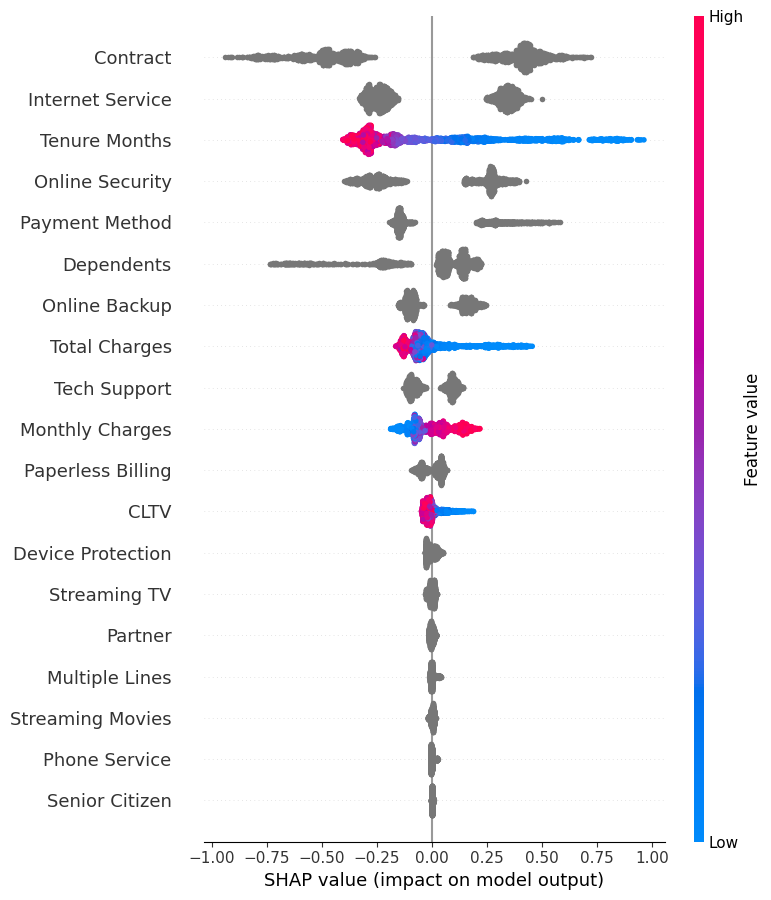

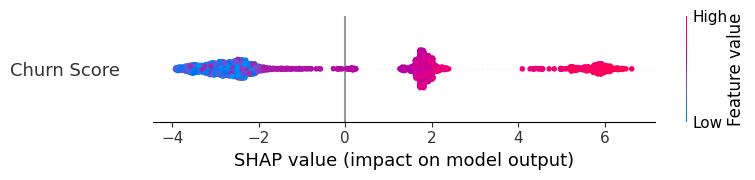

In [ ]:
import numpy as np
import pandas as pd
import catboost
import shap

X = df_cat
y = df_cat_target

# 범주형 변수의 인덱스를 포함하는 리스트를 설정
cat_features_indices = []
for idx, col in enumerate(df_cat.columns):
    if df_cat[col].dtype == 'object':
        cat_features_indices.append(idx)

# 범주형 변수 타입 변경
for column in X.columns:
    if X[column].dtype == 'object':
        X[column] = X[column].astype('category')

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2023)

# 모델 정의 및 학습
model = catboost.CatBoostClassifier(random_state=2023, depth=6, iterations=300, learning_rate=0.009, cat_features=cat_features_indices)
model.fit(X_train, y_train, plot=True, verbose=False)

# SHAP 값을 계산
shap_values = model.get_feature_importance(catboost.Pool(X_test, cat_features=cat_features_indices), type='ShapValues')
shap_values = shap_values[:, :-1]  # 마지막 열은 기본 출력 값 제거

# Churn Score 피처가 있는 위치를 찾기
churn_score_idx = X.columns.tolist().index('Churn Score')
shap_values_without_churn_score = np.delete(shap_values, churn_score_idx, axis=1)
new_feature_names = X.columns.values[:churn_score_idx].tolist() + X.columns.values[churn_score_idx+1:].tolist()

# SHAP 라이브러리를 사용하여 피처별 중요도 확인
shap.initjs()

# 처음래프는 Churn Score를 제외한 피처만 포함
shap.summary_plot(shap_values_without_churn_score, X_test.drop(columns=['Churn Score']), feature_names=new_feature_names)

# 두 번째 그래프는 Churn Score 피처만 포함
shap.summary_plot(shap_values[:, churn_score_idx].reshape(-1, 1), X_test[['Churn Score']], feature_names=['Churn Score'])
